In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
listNames = ['Khulan','Adrian','Mathilde','Virgil','FannyM','Margaux','JL','Hélène','Luca','Brice','ThiMai','Ani','Romain','StephB']
listNames = []
numSubjects=14
for i in range(1,numSubjects+1):
    listNames.append('Subject'+str(i))
_type=['Grasshopper', 'Hybrid', 'Plugin']
niv=['No experience','Novice','Limited','Basic','Advanced','Expert']


In [4]:
def convert_subject_level(n):
    _level = ["Aucune expérience", "Novice", "Limité", "Habitué", "Avancé", "Expert"]
    return _level.index(n)

def diff_analysis(_context):
    _diff = (_context.diff(1, 0) != 0)
    _diff.iloc[0] = False
    _diff['Time'] = _context['Time']
    return _diff

def sub_selection(_context, choice):
    facade_choice = choice
    if facade_choice == 0:
        return _context
    return _context.xs(choice, level='Object', drop_level=False)

def context_reorder(data, choice):
    context_grasshopper = data[(data["Object"] > 1.1) & (data["Object"] < 2)]
    context_hybrid = data[(data["Object"] > 2.1) & (data["Object"] < 3)]
    context_plugin = data[(data["Object"] > 3.1) & (data["Object"] < 4)]
    order1 = context_grasshopper.index[0]
    order2 = context_hybrid.index[0]
    order3 = context_plugin.index[0]
    _order = [_x for _, _x in sorted(zip([order1, order2, order3], [1, 2, 3]))]
    if choice == 0:
        return [context_grasshopper, context_hybrid, context_plugin], ['Grasshopper', 'Hybrid', 'Plugin'], _order
    elif choice == 1:
        return context_grasshopper, 'Grasshopper'
    elif choice == 2:
        return context_hybrid, 'Hybrid'
    elif choice == 3:
        return context_plugin, 'Plugin'
def stat(df):
    total=df.groupby('Object',axis=0).sum()
    total.reset_index(inplace=True)
    total['Type']='Tot'
    total['Order']=0
    total.set_index(['Type'],inplace=True)
    average=df.groupby('Object',axis=0).mean()
    average.reset_index(inplace=True)
    average['Type']='Average'
    average['Order']=0
    average.set_index(['Type'],inplace=True)
    std=df.groupby('Object',axis=0).std()
    std.reset_index(inplace=True)
    std['Type']='Standard Deviation'
    std['Order']=0
    std.set_index(['Type'],inplace=True)
    return total,average,std


Index(['Autocad', 'Blender', 'SketchUp', 'Rhino', 'Grasshopper', 'Revit',
       'Archicad', '3dsMax', 'Average', 'Modeling', 'Bim', 'Rhino+GH'],
      dtype='object')

,Autocad,Blender,SketchUp,Rhino,Grasshopper,Revit,Archicad,3dsMax,Average,Modeling,Bim,Rhino+GH
Nom,,,,,,,,,,,,
Subject1,3,0,3,1,1,2,0,0,2,3,2,1
Subject2,4,0,4,0,0,0,1,0,3,4,1,0
Subject3,4,0,4,2,2,3,0,0,3,4,3,2
Subject4,3,0,3,3,3,4,0,0,3,3,4,3
Subject5,4,0,4,1,1,3,1,0,2,4,3,1
Subject6,3,0,3,2,2,1,2,0,2,3,2,2
Subject7,3,0,4,4,2,0,0,0,3,4,0,3
Subject8,4,0,4,1,1,3,0,0,3,4,3,1
Subject9,3,2,4,3,3,2,1,0,3,4,2,3


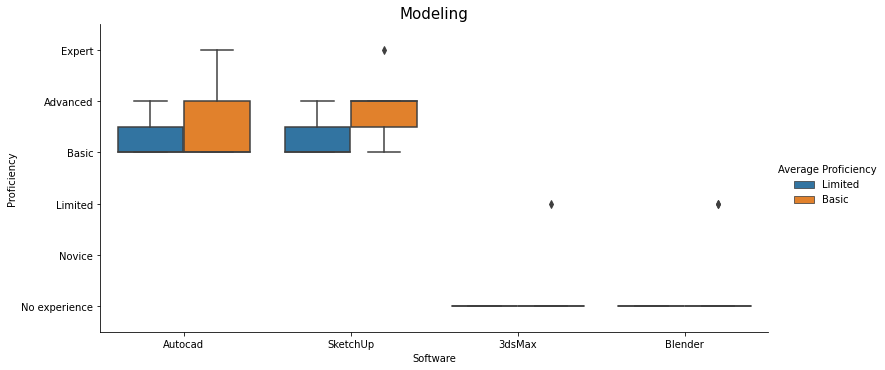

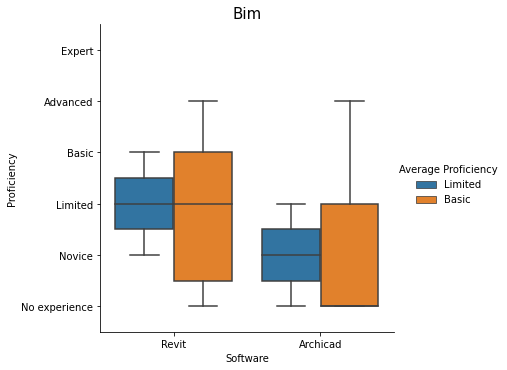

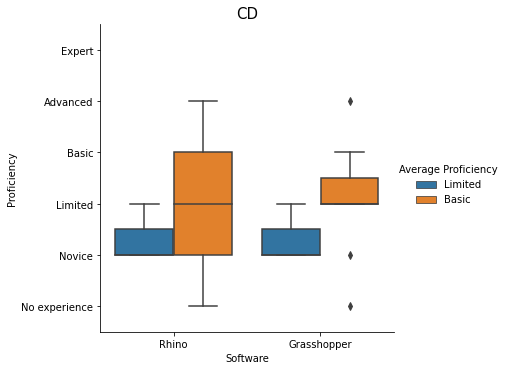

In [5]:
survey=pd.read_excel("Survey.xlsx")
survey['Nom']=listNames
intro= survey.iloc[:, [4, 7, 10, 16]]
subject_level_df= survey.iloc[:, [4, 21, 24, 27, 30, 33, 36, 39, 42]]
detail= survey.iloc[:, [4, 45, 48]]
interaction1_feedback= survey.iloc[:, [4, 51, 54, 57, 60, 63]]
interaction1_feedback.set_index('Nom', inplace=True)
interaction2_feedback= survey.iloc[:, [4, 69, 72, 75, 78, 81]]
interaction2_feedback.set_index('Nom', inplace=True)
interaction3_feedback= survey.iloc[:, [4, 87, 90, 93, 96, 99]]
interaction3_feedback.set_index('Nom', inplace=True)
posteriori_interaction1_feedback= survey.iloc[:, [4, 105, 108, 111, 114, 117]]
posteriori_interaction1_feedback.set_index('Nom', inplace=True)
posteriori_interaction2_feedback= survey.iloc[:, [4, 123, 126, 129, 132, 135]]
posteriori_interaction2_feedback.set_index('Nom', inplace=True)
posteriori_interaction3_feedback= survey.iloc[:, [4, 141, 144, 147, 150, 153]]
posteriori_interaction3_feedback.set_index('Nom', inplace=True)
col=interaction1_feedback.columns
interaction2_feedback.columns=col
interaction3_feedback.columns=col
posteriori_interaction1_feedback.columns=col
posteriori_interaction2_feedback.columns=col
posteriori_interaction3_feedback.columns=col
interaction_feedback=[interaction1_feedback, interaction2_feedback, interaction3_feedback]
posteriori_interaction_feedback=[posteriori_interaction1_feedback, posteriori_interaction2_feedback, posteriori_interaction3_feedback]

subject_level_df.set_index('Nom', inplace=True)
subject_level_df=subject_level_df.applymap(convert_subject_level)
#display(subject_level_df[subject_level_df!=0])
subject_level_df['Average']=subject_level_df[subject_level_df!=0].mean(axis=1).round(0).convert_dtypes(convert_integer=True)
subject_level_df['Modeling']=subject_level_df[subject_level_df!=0][['Autocad','SketchUp','Blender','3dsMax']].max(axis=1).round(0).convert_dtypes(convert_integer=True)
subject_level_df['Bim']=subject_level_df[subject_level_df!=0][['Archicad','Revit']].max(axis=1).fillna(0).round(0).convert_dtypes(convert_integer=True)
subject_level_df['Rhino+GH']=subject_level_df[subject_level_df!=0][['Rhino','Grasshopper']].mean(axis=1).fillna(0).round(0).convert_dtypes(convert_integer=True)
#subject_level_df['Tot'].quantile(q=0.5)
def profile(n):
    low=n.quantile(q=0.33)
    high=n.quantile(q=0.66)
    p=[]
    for x in n:
        if x <= low:
            p.append(0)
        elif low<x<=high:
            p.append(1)
        elif high<x:
            p.append(2)
    return p

profile=subject_level_df.apply(profile, axis=0)
Cat=["Modeling","Bim","CD","Average"]
Software=subject_level_df.columns.tolist()
display(subject_level_df.columns)
level=[0,0,0,2,2,1,1,0,3,3,3,3]
modeling_level_df=subject_level_df.reset_index('Nom').melt(id_vars=('Nom','Average'))
modeling_level_df['Type']=modeling_level_df['variable'].apply(lambda x:Cat[level[Software.index(x)]])
modeling_level_df.sort_values('Average',ascending=True, inplace=True)
modeling_level_df['Average']=modeling_level_df['Average'].apply(lambda x: niv[x])
modeling_level_df.columns=['Nom','Average Proficiency','variable','value','Type']
md= sns.catplot(x='variable',y='value', data=modeling_level_df[modeling_level_df['Type']=="Modeling"], hue="Average Proficiency", kind='box', ci=98, height=5, aspect=2);
md.set_axis_labels("Software","Proficiency");
md.set(ylim=(-0.5,5.5),yticks=[0, 1, 2,3,4,5])
md.set_yticklabels(niv)
md.ax.set_title("Modeling",fontdict={'fontsize':15})
plt.savefig('output/modeling_proficiency.png',bbox_inches='tight')
bim= sns.catplot(x='variable',y='value', data=modeling_level_df[modeling_level_df['Type']=="Bim"], hue="Average Proficiency", kind='box', ci=98, height=5, aspect=1);
bim.set_axis_labels("Software","Proficiency");
bim.ax.set_title("Bim",fontdict={'fontsize':15})
bim.ax.sharey(md.ax)
plt.savefig('output/Bim_proficiency.png',bbox_inches='tight')
CD= sns.catplot(x='variable',y='value', data=modeling_level_df[modeling_level_df['Type']=="CD"], hue="Average Proficiency", kind='box', ci=98, height=5, aspect=1);
CD.set_axis_labels("Software","Proficiency");
CD.ax.set_title("CD",fontdict={'fontsize':15})
CD.ax.sharey(md.ax)
plt.savefig('output/CD_proficiency.png',bbox_inches='tight')
with pd.option_context('display.max_rows', None, 'display.max_columns', 12,'display.max_colwidth',50):
    display(subject_level_df)

In [5]:
iterations_df=pd.DataFrame()
time_iterations_df=pd.DataFrame()
time_phases_df=pd.DataFrame()
time_unique_df=pd.DataFrame()
phase_df=pd.DataFrame()
unique_df=pd.DataFrame()
feedback_df=pd.DataFrame()
for name in listNames:
    path = 'input/'+ name + '/' + name +'.csv'
    test = pd.read_csv(path, encoding='UTF-16BE', sep=';')
    test["Time"] = pd.to_datetime(test["Time"],format = '%H:%M:%S:%f')
    Implementations,Index,Order = context_reorder(test, 0)
    diff_df_list=[]
    phase=pd.DataFrame()
    int_feedback=[_x for _, _x in sorted(zip(Order, interaction_feedback))]
    int_feedback_post=[_x for _, _x in sorted(zip(Order, posteriori_interaction_feedback))]
    unique=pd.DataFrame()
    _time_iterations=pd.DataFrame()
    _time_phases=pd.DataFrame()
    _time_unique=pd.DataFrame()
    iteration=pd.DataFrame()
    _time=[]
    i=0
    time_intervals=11
    for implementation in Implementations:
        object_remap=pd.Series(implementation['Object'].map(lambda x:((x % 1)*10).__round__(0)).convert_dtypes(convert_integer=True))
        implementation.loc[:,'Object']=object_remap
        implementation = implementation.set_index(['Object'],append=True)
        implementation = implementation.rename_axis(['int','Object'])
        imp2=sub_selection(implementation,2)
        last2=imp2['Time'].iloc[-1]
        first2=imp2['Time'].iloc[0]
        imp3=sub_selection(implementation,3)
        last3=imp3['Time'].iloc[-1]
        first3=imp3['Time'].iloc[0]
        imp4=sub_selection(implementation,4)
        last4=imp4['Time'].iloc[-1]
        first4=imp4['Time'].iloc[0]
        delta_time2 = last2 - first2
        delta_time3 = last3 - first3
        delta_time4 = last4 - first4
        _time.append(delta_time2.seconds)
        _time.append(delta_time3.seconds)
        _time.append(delta_time4.seconds)
        diff_df_list.append(diff_analysis(sub_selection(implementation,2)).rename_axis([Index[i],'Object']))
        diff_df_list.append(diff_analysis(sub_selection(implementation,3)).rename_axis([Index[i],'Object']))
        diff_df_list.append(diff_analysis(sub_selection(implementation,4)).rename_axis([Index[i],'Object']))
        for k in range(2,5):
            time_unique=pd.DataFrame()
            imp=sub_selection(implementation,k)
            start_time=imp['Time'].iloc[0]
            imp.loc[:,'Time']= imp['Time'] - start_time
            imp.loc[:,'Time']=imp['Time'].map(lambda x:x.seconds)
            start_time=imp['Time'].iloc[0]
            end_time=imp['Time'].iloc[-1]
            timerange=end_time / time_intervals
            timerange_minutes=timerange/60
            timerange=timerange.__round__(2)
            for j in range(1, time_intervals+1):
                _imp2=imp[(imp['Time'] > start_time) & (imp['Time'] < (start_time + timerange * j))]
                _imp2=_imp2.nunique()
                imp1=imp[(imp['Time'] > start_time) & (imp['Time'] < (start_time + timerange * (j + 1)))].nunique()
                if _imp2.sum()>0:imp1=imp1-_imp2
                else:imp1=imp1*0
                time_unique=time_unique.append(imp1.drop(['Time']),ignore_index=True)

            time_unique[Index[i]]=time_unique.sum(axis=1)#.map(lambda _x:int(_x))
            if timerange>0.1:
                time_unique=time_unique[Index[i]]/timerange_minutes
            else:
                time_unique=time_unique[Index[i]]*0
            time_unique.rename(k,inplace=True)
            time_unique['Object']=k
            _time_unique=_time_unique.append(time_unique)

        _unique=pd.Series(imp2.nunique(axis=0),name=Index[i])
        _unique['Object']=2
        _unique['Order']=Order.index(i+1)+1
        unique=unique.append(_unique)
        _unique=pd.Series(imp3.nunique(axis=0),name=Index[i])
        _unique['Object']=3
        _unique['Order']=Order.index(i+1)+1
        unique=unique.append(_unique)
        _unique=pd.Series(imp4.nunique(axis=0),name=Index[i])
        _unique['Object']=4
        _unique['Order']=Order.index(i+1)+1
        unique=unique.append(_unique)
        i+=1
    i=0

    for diff_df in diff_df_list:
        _type_=diff_df.index.names[0]
        diff_df['Time']-=diff_df['Time'].iloc[0]
        start_time=diff_df['Time'].iloc[0]
        end_time=diff_df['Time'].iloc[-1]
        timerange= (end_time - start_time) / time_intervals
        diff_df.reset_index('Object',inplace=True)
        diff_df.set_index('Time',inplace=True)
        timeit=[]
        timerange_minutes=timerange.microseconds/60000000+timerange.seconds/60
        obj=diff_df['Object'][0]
        if timerange > (start_time-start_time):
            st=diff_df.resample(timerange, closed='left').sum()
            st[_type_]=st.drop('Object',axis=1).sum(axis=1)
            st=st.reset_index()
            st=st[_type_]
            st.iloc[-2]=st.iloc[-2]+st.iloc[-1]
            st=st.iloc[:-1]/timerange_minutes
            st['Object']=obj
        else:
            st=pd.DataFrame(data=None,index=range(11))
            st[_type_]=1
            st=st[_type_]
            st['Object']=obj
        _time_iterations=_time_iterations.append(st)

        l=((diff_df * 1).diff(1, 0) == 1)
        if timerange > (start_time-start_time):
            st=l.resample(timerange,closed='left').sum()
            st[_type_]=st.drop('Object',axis=1).sum(axis=1)
            st=st.reset_index()
            st=st[_type_]
            st.iloc[-2]=st.iloc[-2]+st.iloc[-1]
            st=st.iloc[:-1]/timerange_minutes
            st['Object']=obj
        else:
            st=pd.DataFrame(data=None,index=range(11))
            st[_type_]=1
            st=st[_type_]
            st['Object']=obj
        _time_phases=_time_phases.append(st)
        l=l.sum()
        l['Time']=_time[i]
        l['Object']=obj
        l['Order']=Order.index(_type.index(_type_)+1)+1
        l.name=_type_
        phase=phase.append(l)
        obj=diff_df['Object'][0]
        t=diff_df.sum()
        t['Time']=_time[i]
        t['Object']=obj
        t.name=_type_
        t['Order']=Order.index(_type.index(_type_)+1)+1
        i=i+1
        iteration=iteration.append(t)

    prf=""
    for level in subject_level_df.loc[name].values:
        prf=prf+str(int(level)).strip()
    Index1=_time_iterations.index


    #Iterations

    iterations = pd.DataFrame(iteration,index=Index1)
    iterations=iterations.set_index(['Object','Order'],append=True)
    total_iterations,average_iterations, std_iterations = stat(iterations)
    iteration=iteration.append(total_iterations)
    iteration=iteration.append(average_iterations)
    iteration=iteration.append(std_iterations)
    iteration['Name']=name
    iteration['Level']=prf
    iteration['Object']=iteration['Object'].convert_dtypes(convert_integer=True)
    iteration['Order']=iteration['Order'].convert_dtypes(convert_integer=True)
    iteration.rename_axis('Type',inplace=True)
    iteration = iteration.fillna(0)
    iteration.set_index(['Name','Object','Order','Level'],append=True,inplace=True)
    iteration = iteration.reorder_levels(['Name','Level','Order','Type','Object'])

    #Phases

    phases = pd.DataFrame(phase,index=Index1)
    phases=phases.set_index(['Object','Order'],append=True)
    total_phases,avg_phases,std_phases = stat(phases)
    phase=phase.append(total_phases)
    phase=phase.append(avg_phases)
    phase=phase.append(std_phases)
    phase['Name']=name
    phase['Level']=prf
    phase['Object']=phase['Object'].convert_dtypes(convert_integer=True)
    phase['Order']=phase['Order'].convert_dtypes(convert_integer=True)
    phase.rename_axis('Type',inplace=True)
    phase = phase.fillna(0)
    phase.set_index(['Name','Object','Order','Level'],append=True,inplace=True)
    phase = phase.reorder_levels(['Name','Level','Order','Type','Object'])

    # Unique

    unique_vals = pd.DataFrame(unique, index=Index1)
    unique_vals=unique_vals.set_index(['Object','Order'],append=True)
    tot_unique_vals,avg_unique_vals,std_unique_vals = stat(unique_vals)
    unique = unique.append(tot_unique_vals)
    unique = unique.append(avg_unique_vals)
    unique = unique.append(std_unique_vals)
    unique['Name']=name
    unique['Level']=prf
    unique['Object']=unique['Object'].convert_dtypes(convert_integer=True)
    unique['Order']=unique['Order'].convert_dtypes(convert_integer=True)
    unique.rename_axis('Type',inplace=True)
    unique = unique.fillna(0)
    unique.set_index(['Name','Object','Order','Level'],append=True,inplace=True)
    unique = unique.reorder_levels(['Name','Level','Order','Type','Object'])
    unique['Time']=phase['Time']

    ##

    Name = [name]
    Index=iteration.drop(['Tot','Average','Standard Deviation'],axis=0,level='Type').index
    Index2=Index.droplevel('Object').drop_duplicates()
    feedback_post=pd.DataFrame([int_feedback_post[0].xs(name), int_feedback_post[1].xs(name), int_feedback_post[2].xs(name)], index=Index2)
    feedback=pd.DataFrame([int_feedback[0].xs(name), int_feedback[1].xs(name), int_feedback[2].xs(name)], index=Index2)
    _time_iterations=pd.DataFrame(_time_iterations.drop(['Object'],axis=1).values, index=Index)
    _time_iterations_tot=_time_iterations.groupby(['Name','Level','Object'],axis=0).mean()
    _time_iterations_tot['Type']='Tot'
    _time_iterations_tot['Order']=0
    _time_iterations_tot.set_index(['Type','Order'],append=True,inplace=True)
    _time_iterations_tot=_time_iterations_tot.reorder_levels(['Name','Level','Order','Type','Object'])
    _time_iterations=_time_iterations.append(_time_iterations_tot)
    _time_iterations_av=_time_iterations_tot.rename(lambda x:'Average',axis=0,level='Type')
    _time_iterations=_time_iterations.append(_time_iterations_av)
    display(_time_iterations)
    _time_phases=pd.DataFrame(_time_phases.drop(['Object'],axis=1).values, index=Index)
    _time_phases_tot=_time_phases.groupby(['Name','Level','Object'],axis=0).mean().convert_dtypes(convert_integer=True)
    _time_phases_tot['Type']='Tot'
    _time_phases_tot['Order']=0
    _time_phases_tot.set_index(['Type','Order'],append=True,inplace=True)
    _time_phases_tot=_time_phases_tot.reorder_levels(['Name','Level','Order','Type','Object'])
    _time_phases=_time_phases.append(_time_phases_tot)
    _time_phases_av=_time_phases_tot.rename(lambda x:'Average',axis=0,level='Type')
    _time_phases=_time_phases.append(_time_phases_av)
    display(_time_phases)
    _time_unique=pd.DataFrame(_time_unique.drop(['Object'],axis=1).values, index=Index)
    _time_unique_tot=_time_unique.groupby(['Name','Level','Object'],axis=0).mean()
    _time_unique_tot['Type']='Tot'
    _time_unique_tot['Order']=0
    _time_unique_tot.set_index(['Type','Order'],append=True,inplace=True)
    _time_unique_tot=_time_unique_tot.reorder_levels(['Name','Level','Order','Type','Object'])
    _time_unique=_time_unique.append(_time_unique_tot)
    _time_unique_av=_time_unique_tot.rename(lambda x:'Average',axis=0,level='Type')
    _time_unique=_time_unique.append(_time_unique_av)
    display(_time_unique)

    feedback_tot=feedback.groupby(['Name','Level'],axis=0).mean()
    feedback_tot['Order']=0
    feedback_tot['Type']='Tot'
    feedback_tot.set_index(['Order','Type'],append=True,inplace=True)
    feedback_av=feedback_tot.rename(lambda x:'Average',axis=0,level='Type')
    feedback=feedback.append(feedback_tot)
    feedback=feedback.append(feedback_av)
    feedback['Survey']= 'A'
    feedback_tot=feedback_post.groupby(['Name','Level'],axis=0).mean()
    feedback_tot['Order']=0
    feedback_tot['Type']='Tot'
    feedback_av=feedback_post.groupby(['Name','Level'],axis=0).mean()
    feedback_av['Type']='Average'
    feedback_av['Order']=0
    feedback_tot.set_index(['Order','Type'],append=True,inplace=True)
    feedback_av.set_index(['Order','Type'],append=True,inplace=True)
    feedback_post=feedback_post.append(feedback_tot)
    feedback_post=feedback_post.append(feedback_av)
    feedback_post['Survey']= 'B'
    feedback=feedback.append(feedback_post)
    feedback.set_index('Survey', append=True, inplace=True)
    unique['Max']=unique.drop('Time',axis=1).max(axis=1)
    unique['Total']=unique.drop(['Max','Time'],axis=1).sum(axis=1)
    unique['CV']=unique.drop(['Total','Max','Time'],axis=1).std(axis=1)/unique.drop(['Time','Total','Max'],axis=1).mean(axis=1)
    phase['Max']=phase.drop('Time',axis=1).max(axis=1)
    phase['Total']=phase.drop(['Max','Time'],axis=1).sum(axis=1)
    phase['CV']=phase.drop(['Total','Max','Time'],axis=1).std(axis=1)/phase.drop(['Time','Total','Max'],axis=1).mean(axis=1)

    iteration['Max']=iteration.drop('Time',axis=1).max(axis=1)
    iteration['Total']=iteration.drop(['Max','Time'],axis=1).sum(axis=1)
    iteration['CV']=iteration.drop(['Total','Max','Time'],axis=1).std(axis=1)/iteration.drop(['Time','Total','Max'],axis=1).mean(axis=1)

    if iterations_df.shape[0]>1:
        iterations_df = iterations_df.append(iteration)
        phase_df = phase_df.append(phase)
        unique_df = unique_df.append(unique)
        feedback_df = feedback_df.append(feedback)
        time_iterations_df=time_iterations_df.append(_time_iterations)
        time_phases_df=time_phases_df.append(_time_phases)
        time_unique_df=time_unique_df.append(_time_unique)
    elif iterations_df.shape[0]<1 :
        iterations_df=iteration
        phase_df=phase
        unique_df = unique
        feedback_df = feedback
        time_iterations_df = _time_iterations
        time_phases_df = _time_phases
        time_unique_df= _time_unique
feedback_df.columns=['Accessibility', 'Comprehension', 'Ease of Use', 'Usability', 'Satisfaction']
feedback_df=feedback_df.reset_index(['Name','Type', 'Level', 'Order', 'Survey'], drop=False)
feedback_df=feedback_df.melt(id_vars=['Name','Type', 'Level', 'Order', 'Survey'])
with pd.option_context('display.max_rows', None, 'display.max_columns', 12,'display.max_colwidth',50):
#display(iterations_df.round(decimals=2))
    display(type(feedback_df))
v=iterations_df.xs('Subject2',level='Name',drop_level=False).xs('Hybrid',level='Type',drop_level=False).index
iterations_df=iterations_df.drop(v)
iterations_df.to_csv('input/iterations.csv',encoding='UTF-16BE',sep=";")
phase_df=phase_df.drop(v)
phase_df.to_csv('input/phase.csv',encoding='UTF-16BE',sep=";")
unique_df=unique_df.drop(v)
unique_df.to_csv('input/unique.csv',encoding='UTF-16BE',sep=";")
time_iterations_df.to_csv('input/time_iterations.csv',encoding='UTF-8',sep=";")
time_unique_df.to_csv('input/time_unique.csv',encoding='UTF-8',sep=";")
time_phases_df.to_csv('input/time_phases.csv',encoding='UTF-8',sep=";")
feedback_df.to_csv('input/feedback.csv',encoding='UTF-16BE',sep=";",index=False)

C:\Users\Xavier\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0          1  \
Name     Level        Order Type        Object                         
Subject1 303112002321 1     Grasshopper 2       10.489010  55.941389   
                                        3        0.000000  18.214057   
                                        4        0.000000   0.000000   
                      2     Hybrid      2        9.361703   4.680851   
                                        3        0.000000   0.000000   
                                        4        7.443329   7.443329   
                      3     Plugin      2        0.000000  27.082852   
                                        3        0.000000  23.056500   
                                        4        0.000000   0.000000   
                      0     Tot         2        6.616904  29.235031   
                                        3        0.000000  13.756852   
                                        4        2.481110   2.481110   
                            Average     2        6.616904  29.235031   
                                        3        0.000000  13.756852   
                                        4        2.481110   2.481110   

                                                        2          3  \
Name     Level        Order Type        Object                         
Subject1 303112002321 1     Grasshopper 2       24.474358  17.481684   
                                        3       13.660543  27.321086   
                                        4        8.984115  62.888806   
                      2     Hybrid      2       14.042554  14.042554   
                                        3       12.302645  24.605290   
                                        4        7.443329   7.443329   
                      3     Plugin      2        0.000000   0.000000   
                                        3        7.685500  15.371000   
                                        4        0.000000   0.000000   
                      0     Tot         2       12.838971  10.508079   
                                        3       11.216229  22.432459   
                                        4        5.475815  23.444045   
                            Average     2       12.838971  10.508079   
                                        3       11.216229  22.432459   
                                        4        5.475815  23.444045   

                                                        4          5  \
Name     Level        Order Type        Object                         
Subject1 303112002321 1     Grasshopper 2       10.489010  38.459705   
                                        3       40.981628  81.963257   
                                        4       17.968230   8.984115   
                      2     Hybrid      2        4.680851  14.042554   
                                        3        0.000000  12.302645   
                                        4        7.443329  14.886659   
                      3     Plugin      2        0.000000   9.027617   
                                        3        7.685500   7.685500   
                                        4        0.000000  31.415109   
                      0     Tot         2        5.056621  20.509959   
                                        3       16.222376  33.983801   
                                        4        8.470520  18.428628   
                            Average     2        5.056621  20.509959   
                                        3       16.222376  33.983801   
                                        4        8.470520  18.428628   

                                                        6          7  \
Name     Level        Order Type        Object                         
Subject1 303112002321 1     Grasshopper 2       38.459705  38.459705   
                                        3       27.321086  86.516771   
                                        4       17.968230   0.000000   
                     

0         1          2  \
Name     Level        Order Type        Object                                  
Subject1 303112002321 1     Grasshopper 2       3.496337  3.496337   3.496337   
                                        3            0.0  4.553514   4.553514   
                                        4            0.0       0.0   8.984115   
                      2     Hybrid      2       4.680851       0.0   4.680851   
                                        3            0.0       0.0  12.302645   
                                        4       7.443329  7.443329   7.443329   
                      3     Plugin      2            0.0  9.027617        0.0   
                                        3            0.0    15.371        0.0   
                                        4            0.0       0.0        0.0   
                      0     Tot         2       2.725729  4.174651   2.725729   
                                        3            0.0  6.641505    5.61872   
                                        4        2.48111   2.48111   5.475815   
                            Average     2       2.725729  4.174651   2.725729   
                                        3            0.0  6.641505    5.61872   
                                        4        2.48111   2.48111   5.475815   

                                                        3         4  \
Name     Level        Order Type        Object                        
Subject1 303112002321 1     Grasshopper 2        3.496337       0.0   
                                        3        4.553514  9.107029   
                                        4             0.0  8.984115   
                      2     Hybrid      2        4.680851  4.680851   
                                        3       12.302645       0.0   
                                        4             0.0  7.443329   
                      3     Plugin      2             0.0       0.0   
                                        3          15.371    7.6855   
                                        4             0.0       0.0   
                      0     Tot         2        2.725729  1.560284   
                                        3       10.742387   5.59751   
                                        4             0.0  5.475815   
                            Average     2        2.725729  1.560284   
                                        3       10.742387   5.59751   
                                        4             0.0  5.475815   

                                                        5         6  \
Name     Level        Order Type        Object                        
Subject1 303112002321 1     Grasshopper 2        3.496337  3.496337   
                                        3        9.107029  4.553514   
                                        4             0.0  8.984115   
                      2     Hybrid      2        9.361703  4.680851   
                                        3       12.302645       0.0   
                                        4             0.0       0.0   
                      3     Plugin      2        9.027617  9.027617   
                                        3          7.6855    7.6855   
                                        4       31.415109       0.0   
                      0     Tot         2        7.295219  5.734935   
                                        3        9.698391  4.079671   
                                        4       10.471703  2.994705   
                            Average     2        7.295219  5.734935   
                                        3        9.698391  4.079671   
                                        4       10.471703  2.994705   

                                                        7          8  \
Name     Level        Order Type        Object                         
Subject1 303112002321 1     Grasshopper 2        6.992674   3.496337   
                                        3    

0          1  \
Name     Level        Order Type        Object                         
Subject1 303112002321 1     Grasshopper 2       35.106383  17.553191   
                                        3        0.000000  13.750000   
                                        4        0.000000   0.000000   
                      2     Hybrid      2        4.680851   9.361702   
                                        3        0.000000   0.000000   
                                        4        0.000000   7.500000   
                      3     Plugin      2        0.000000   0.000000   
                                        3        0.000000   7.764706   
                                        4        0.000000   0.000000   
                      0     Tot         2       13.262411   8.971631   
                                        3        0.000000   7.171569   
                                        4        0.000000   2.500000   
                            Average     2       13.262411   8.971631   
                                        3        0.000000   7.171569   
                                        4        0.000000   2.500000   

                                                        2          3  \
Name     Level        Order Type        Object                         
Subject1 303112002321 1     Grasshopper 2       17.553191  10.531915   
                                        3       18.333333  27.500000   
                                        4       36.164384  18.082192   
                      2     Hybrid      2        4.680851   4.680851   
                                        3       24.905660   0.000000   
                                        4        7.500000   7.500000   
                      3     Plugin      2        0.000000   0.000000   
                                        3       15.529412   0.000000   
                                        4        0.000000   0.000000   
                      0     Tot         2        7.411348   5.070922   
                                        3       19.589468   9.166667   
                                        4       14.554795   8.527397   
                            Average     2        7.411348   5.070922   
                                        3       19.589468   9.166667   
                                        4       14.554795   8.527397   

                                                        4          5  \
Name     Level        Order Type        Object                         
Subject1 303112002321 1     Grasshopper 2       35.106383  17.553191   
                                        3       77.916667  13.750000   
                                        4        0.000000  18.082192   
                      2     Hybrid      2       14.042553   9.361702   
                                        3       12.452830  12.452830   
                                        4       15.000000   0.000000   
                      3     Plugin      2        9.041096   9.041096   
                                        3       15.529412   7.764706   
                                        4        0.000000   0.000000   
                      0     Tot         2       19.396677  11.985330   
                                        3       35.299636  11.322512   
                                        4        5.000000   6.027397   
                            Average     2       19.396677  11.985330   
                                        3       35.299636  11.322512   
                                        4        5.000000   6.027397   

                                                        6          7  \
Name     Level        Order Type        Object                         
Subject1 303112002321 1     Grasshopper 2       35.106383  28.085106   
                                        3       45.833333  22.916667   
                                        4        0.000000   0.000000   
                     

C:\Users\Xavier\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0          1  \
Name     Level        Order Type        Object                        
Subject2 404000103410 3     Grasshopper 2       0.000000  30.570417   
                                        3       0.000000  10.384543   
                                        4       0.000000   0.000000   
                      1     Hybrid      2       9.739685   0.000000   
                                        3       0.000000   0.000000   
                                        4       0.000000   0.000000   
                      2     Plugin      2       9.628290   4.814145   
                                        3       0.000000   0.000000   
                                        4       0.000000   0.000000   
                      0     Tot         2       6.455992  11.794854   
                                        3       0.000000   3.461514   
                                        4       0.000000   0.000000   
                            Average     2       6.455992  11.794854   
                                        3       0.000000   3.461514   
                                        4       0.000000   0.000000   

                                                        2          3  \
Name     Level        Order Type        Object                         
Subject2 404000103410 3     Grasshopper 2       30.570417  26.749115   
                                        3       20.769086   0.000000   
                                        4       10.458760  20.917519   
                      1     Hybrid      2        0.000000  19.479370   
                                        3        0.000000   0.000000   
                                        4        0.000000   0.000000   
                      2     Plugin      2        9.628290  33.699016   
                                        3        5.595971  11.191942   
                                        4        0.000000   0.000000   
                      0     Tot         2       13.399569  26.642500   
                                        3        8.788352   3.730647   
                                        4        3.486253   6.972506   
                            Average     2       13.399569  26.642500   
                                        3        8.788352   3.730647   
                                        4        3.486253   6.972506   

                                                        4          5  \
Name     Level        Order Type        Object                         
Subject2 404000103410 3     Grasshopper 2       22.927813  19.106511   
                                        3       10.384543   0.000000   
                                        4       10.458760   0.000000   
                      1     Hybrid      2        9.739685  12.174606   
                                        3        6.456378   3.228189   
                                        4        9.681714   4.840857   
                      2     Plugin      2        4.814145   4.814145   
                                        3       11.191942  16.787913   
                                        4        0.000000   0.000000   
                      0     Tot         2       12.493881  12.031754   
                                        3        9.344288   6.672034   
                                        4        6.713491   1.613619   
                            Average     2       12.493881  12.031754   
                                        3        9.344288   6.672034   
                                        4        6.713491   1.613619   

                                                        6          7  \
Name     Level        Order Type        Object                         
Subject2 404000103410 3     Grasshopper 2       19.106511  57.319532   
                                        3       10.384543   0.000000   
                                        4        0.000000   0.000000   
                      1     Hybrid   

0          1         2  \
Name     Level        Order Type        Object                                  
Subject2 404000103410 3     Grasshopper 2            0.0   7.642604  3.821302   
                                        3            0.0  10.384543       0.0   
                                        4            0.0        0.0  10.45876   
                      1     Hybrid      2       7.304764        0.0       0.0   
                                        3            0.0        0.0       0.0   
                                        4            0.0        0.0       0.0   
                      2     Plugin      2        9.62829   4.814145   9.62829   
                                        3            0.0        0.0  5.595971   
                                        4            0.0        0.0       0.0   
                      0     Tot         2       5.644351    4.15225  4.483197   
                                        3            0.0   3.461514  1.865324   
                                        4            0.0        0.0  3.486253   
                            Average     2       5.644351    4.15225  4.483197   
                                        3            0.0   3.461514  1.865324   
                                        4            0.0        0.0  3.486253   

                                                        3          4  \
Name     Level        Order Type        Object                         
Subject2 404000103410 3     Grasshopper 2        3.821302   7.642604   
                                        3             0.0  10.384543   
                                        4             0.0        0.0   
                      1     Hybrid      2        7.304764   2.434921   
                                        3             0.0   3.228189   
                                        4             0.0   2.420428   
                      2     Plugin      2         9.62829   4.814145   
                                        3       11.191942  11.191942   
                                        4             0.0        0.0   
                      0     Tot         2        6.918119    4.96389   
                                        3        3.730647   8.268225   
                                        4             0.0   0.806809   
                            Average     2        6.918119    4.96389   
                                        3        3.730647   8.268225   
                                        4             0.0   0.806809   

                                                        5          6  \
Name     Level        Order Type        Object                         
Subject2 404000103410 3     Grasshopper 2        3.821302   3.821302   
                                        3             0.0   5.192272   
                                        4             0.0        0.0   
                      1     Hybrid      2             0.0        0.0   
                                        3        3.228189        0.0   
                                        4        2.420428        0.0   
                      2     Plugin      2        4.814145        0.0   
                                        3       16.787913  11.191942   
                                        4             0.0  44.405598   
                      0     Tot         2        2.878482   1.273767   
                                        3        6.672034   5.461404   
                                        4        0.806809  14.801866   
                            Average     2        2.878482   1.273767   
                                        3        6.672034   5.461404   
                                        4        0.806809  14.801866   

                                                       7         8          9  \
Name     Level        Order Type        Object                                  
Subject2 404000103410 3     Grasshopper 2       7.642604       0.

0          1  \
Name     Level        Order Type        Object                        
Subject2 404000103410 3     Grasshopper 2       0.000000  19.186047   
                                        3       0.000000  10.393701   
                                        4       0.000000   0.000000   
                      1     Hybrid      2       0.000000   0.000000   
                                        3       0.000000   0.000000   
                                        4       0.000000   0.000000   
                      2     Plugin      2       4.817518   9.635036   
                                        3       0.000000   0.000000   
                                        4       0.000000   0.000000   
                      0     Tot         2       1.605839   9.607028   
                                        3       0.000000   3.464567   
                                        4       0.000000   0.000000   
                            Average     2       1.605839   9.607028   
                                        3       0.000000   3.464567   
                                        4       0.000000   0.000000   

                                                        2          3  \
Name     Level        Order Type        Object                         
Subject2 404000103410 3     Grasshopper 2        7.674419  11.511628   
                                        3        0.000000  10.393701   
                                        4       20.952381  10.476190   
                      1     Hybrid      2        2.435424   7.306273   
                                        3        0.000000   0.000000   
                                        4        0.000000   0.000000   
                      2     Plugin      2       28.905109   4.817518   
                                        3       11.282051  11.282051   
                                        4        0.000000   0.000000   
                      0     Tot         2       13.004984   7.878473   
                                        3        3.760684   7.225251   
                                        4        6.984127   3.492063   
                            Average     2       13.004984   7.878473   
                                        3        3.760684   7.225251   
                                        4        6.984127   3.492063   

                                                        4          5  \
Name     Level        Order Type        Object                         
Subject2 404000103410 3     Grasshopper 2        7.674419  11.511628   
                                        3        0.000000  10.393701   
                                        4        0.000000   0.000000   
                      1     Hybrid      2        9.741697   7.306273   
                                        3        3.235294   0.000000   
                                        4        4.852941   0.000000   
                      2     Plugin      2        4.817518   4.817518   
                                        3       11.282051  45.128205   
                                        4        0.000000   0.000000   
                      0     Tot         2        7.411211   7.878473   
                                        3        4.839115  18.507302   
                                        4        1.617647   0.000000   
                            Average     2        7.411211   7.878473   
                                        3        4.839115  18.507302   
                                        4        1.617647   0.000000   

                                                        6          7  \
Name     Level        Order Type        Object                         
Subject2 404000103410 3     Grasshopper 2       53.720930   3.837209   
                                        3        0.000000   5.196850   
                                        4        0.000000   0.000000   
                      1     Hybrid   

C:\Users\Xavier\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0          1  \
Name     Level        Order Type        Object                         
Subject3 404223003432 2     Grasshopper 2        5.001990  10.003979   
                                        3       11.248499  11.248499   
                                        4        0.000000   0.000000   
                      3     Hybrid      2        6.700508   0.000000   
                                        3        7.550768  10.067690   
                                        4        0.000000   5.061233   
                      1     Plugin      2        4.382645   8.765290   
                                        3        0.000000   0.000000   
                                        4        0.000000   0.000000   
                      0     Tot         2        5.361714   6.256423   
                                        3        6.266422   7.105396   
                                        4        0.000000   1.687078   
                            Average     2        5.361714   6.256423   
                                        3        6.266422   7.105396   
                                        4        0.000000   1.687078   

                                                        2          3  \
Name     Level        Order Type        Object                         
Subject3 404223003432 2     Grasshopper 2        2.500995  10.003979   
                                        3        0.000000  22.496998   
                                        4        0.000000  15.493687   
                      3     Hybrid      2        0.000000   0.000000   
                                        3        7.550768  10.067690   
                                        4       10.122467   5.061233   
                      1     Plugin      2       13.147935   8.765290   
                                        3        0.000000   0.000000   
                                        4        0.000000   0.000000   
                      0     Tot         2        5.216310   6.256423   
                                        3        2.516923  10.854896   
                                        4        3.374156   6.851640   
                            Average     2        5.216310   6.256423   
                                        3        2.516923  10.854896   
                                        4        3.374156   6.851640   

                                                        4          5  \
Name     Level        Order Type        Object                         
Subject3 404223003432 2     Grasshopper 2        0.000000   5.001990   
                                        3        5.624250  16.872749   
                                        4        0.000000   0.000000   
                      3     Hybrid      2        3.350254   6.700508   
                                        3       10.067690  17.618458   
                                        4        5.061233   5.061233   
                      1     Plugin      2       17.530580   0.000000   
                                        3        0.000000   0.000000   
                                        4        0.000000   0.000000   
                      0     Tot         2        6.960278   3.900832   
                                        3        5.230647  11.497069   
                                        4        1.687078   1.687078   
                            Average     2        6.960278   3.900832   
                                        3        5.230647  11.497069   
                                        4        1.687078   1.687078   

                                                        6          7  \
Name     Level        Order Type        Object                         
Subject3 404223003432 2     Grasshopper 2       32.512932  17.506963   
                                        3       11.248499  11.248499   
                                        4       15.493687   0.000000   
                     

0         1         2  \
Name     Level        Order Type        Object                                 
Subject3 404223003432 2     Grasshopper 2       2.500995       0.0       0.0   
                                        3        5.62425       0.0       0.0   
                                        4            0.0       0.0       0.0   
                      3     Hybrid      2       3.350254       0.0       0.0   
                                        3       5.033845  5.033845  5.033845   
                                        4            0.0  5.061233       0.0   
                      1     Plugin      2       4.382645  4.382645   8.76529   
                                        3            0.0       0.0       0.0   
                                        4            0.0       0.0       0.0   
                      0     Tot         2       3.411298  1.460882  2.921763   
                                        3       3.552698  1.677948  1.677948   
                                        4            0.0  1.687078       0.0   
                            Average     2       3.411298  1.460882  2.921763   
                                        3       3.552698  1.677948  1.677948   
                                        4            0.0  1.687078       0.0   

                                                        3         4         5  \
Name     Level        Order Type        Object                                  
Subject3 404223003432 2     Grasshopper 2             0.0       0.0       0.0   
                                        3         5.62425       0.0   5.62425   
                                        4       15.493687       0.0       0.0   
                      3     Hybrid      2             0.0       0.0  3.350254   
                                        3        7.550768       0.0       0.0   
                                        4        5.061233       0.0       0.0   
                      1     Plugin      2         8.76529  4.382645       0.0   
                                        3             0.0       0.0       0.0   
                                        4             0.0       0.0       0.0   
                      0     Tot         2        2.921763  1.460882  1.116751   
                                        3        4.391672       0.0   1.87475   
                                        4         6.85164       0.0       0.0   
                            Average     2        2.921763  1.460882  1.116751   
                                        3        4.391672       0.0   1.87475   
                                        4         6.85164       0.0       0.0   

                                                       6         7          8  \
Name     Level        Order Type        Object                                  
Subject3 404223003432 2     Grasshopper 2        5.00199  2.500995   7.502984   
                                        3            0.0   5.62425    5.62425   
                                        4            0.0       0.0        0.0   
                      3     Hybrid      2       6.700508  6.700508   6.700508   
                                        3       5.033845       0.0   2.516923   
                                        4            0.0  5.061233  10.122467   
                      1     Plugin      2       4.382645   8.76529   4.382645   
                                        3            0.0       0.0        0.0   
                                        4            0.0       0.0        0.0   
                      0     Tot         2       5.361714  5.988931   6.195379   
                                        3       1.677948   1.87475   2.713724   
                                        4            0.0  1.687078   3.374156   
                            Average     2       5.361714  5.988931   6.195379   
                                        3       1.677948   1.87475   2.713724   
                    

0          1  \
Name     Level        Order Type        Object                         
Subject3 404223003432 2     Grasshopper 2        7.528517   2.509506   
                                        3        5.641026   0.000000   
                                        4        0.000000   0.000000   
                      3     Hybrid      2        0.000000   0.000000   
                                        3       10.076336   7.557252   
                                        4        0.000000  10.153846   
                      1     Plugin      2        8.800000  13.200000   
                                        3        0.000000   0.000000   
                                        4        0.000000   0.000000   
                      0     Tot         2        5.442839   5.236502   
                                        3        5.239121   2.519084   
                                        4        0.000000   3.384615   
                            Average     2        5.442839   5.236502   
                                        3        5.239121   2.519084   
                                        4        0.000000   3.384615   

                                                        2          3  \
Name     Level        Order Type        Object                         
Subject3 404223003432 2     Grasshopper 2        2.509506   0.000000   
                                        3       22.564103   0.000000   
                                        4        0.000000   0.000000   
                      3     Hybrid      2        0.000000   3.350254   
                                        3       10.076336  10.076336   
                                        4        5.076923   5.076923   
                      1     Plugin      2        4.400000   8.800000   
                                        3        0.000000   0.000000   
                                        4        0.000000   0.000000   
                      0     Tot         2        2.303169   4.050085   
                                        3       10.880146   3.358779   
                                        4        1.692308   1.692308   
                            Average     2        2.303169   4.050085   
                                        3       10.880146   3.358779   
                                        4        1.692308   1.692308   

                                                        4          5  \
Name     Level        Order Type        Object                         
Subject3 404223003432 2     Grasshopper 2        2.509506  27.604563   
                                        3       16.923077   5.641026   
                                        4        0.000000  15.714286   
                      3     Hybrid      2        6.700508   6.700508   
                                        3       17.633588  12.595420   
                                        4        5.076923   5.076923   
                      1     Plugin      2        0.000000   8.800000   
                                        3        0.000000   0.000000   
                                        4        0.000000   0.000000   
                      0     Tot         2        3.070004  14.368357   
                                        3       11.518888   6.078815   
                                        4        1.692308   6.930403   
                            Average     2        3.070004  14.368357   
                                        3       11.518888   6.078815   
                                        4        1.692308   6.930403   

                                                        6          7  \
Name     Level        Order Type        Object                         
Subject3 404223003432 2     Grasshopper 2        7.528517  20.076046   
                                        3       11.282051   5.641026   
                                        4        0.000000   0.000000   
                     

C:\Users\Xavier\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0         1         2  \
Name     Level        Order Type        Object                                 
Subject4 303334003343 1     Grasshopper 2       1.927300  5.781900  3.854600   
                                        3       0.000000  2.228006  0.000000   
                                        4       0.000000  3.293964  3.293964   
                      3     Hybrid      2       3.518489  8.796224  0.000000   
                                        3       0.000000  0.000000  0.000000   
                                        4       0.000000  3.728814  3.728814   
                      2     Plugin      2       0.000000  4.349861  2.174930   
                                        3       2.746018  0.000000  0.000000   
                                        4       3.419689  0.000000  0.000000   
                      0     Tot         2       1.815263  6.309328  2.009843   
                                        3       0.915339  0.742669  0.000000   
                                        4       1.139896  2.340926  2.340926   
                            Average     2       1.815263  6.309328  2.009843   
                                        3       0.915339  0.742669  0.000000   
                                        4       1.139896  2.340926  2.340926   

                                                       3          4  \
Name     Level        Order Type        Object                        
Subject4 303334003343 1     Grasshopper 2       1.927300   7.709200   
                                        3       6.684018   2.228006   
                                        4       3.293964   1.646982   
                      3     Hybrid      2       6.157357  10.555468   
                                        3       0.000000   0.000000   
                                        4       3.728814   3.728814   
                      2     Plugin      2       4.349861   4.349861   
                                        3       0.000000   0.000000   
                                        4       0.000000   0.000000   
                      0     Tot         2       4.144839   7.538176   
                                        3       2.228006   0.742669   
                                        4       2.340926   1.791932   
                            Average     2       4.144839   7.538176   
                                        3       2.228006   0.742669   
                                        4       2.340926   1.791932   

                                                        5          6  \
Name     Level        Order Type        Object                         
Subject4 303334003343 1     Grasshopper 2       11.563800  12.527450   
                                        3        4.456012   0.000000   
                                        4        0.000000   0.000000   
                      3     Hybrid      2        4.398112   7.916601   
                                        3        0.000000   0.000000   
                                        4        3.728814   3.728814   
                      2     Plugin      2        2.174930   4.349861   
                                        3        0.000000   2.746018   
                                        4        0.000000   0.000000   
                      0     Tot         2        6.045614   8.264637   
                                        3        1.485337   0.915339   
                                        4        1.242938   1.242938   
                            Average     2        6.045614   8.264637   
                                        3        1.485337   0.915339   
                                        4        1.242938   1.242938   

                                                       7         8          9  \
Name     Level        Order Type        Object                                  
Subject4 303334003343 1     Grasshopper 2       0.000000  6.745550  14.454750   
                  

0         1         2  \
Name     Level        Order Type        Object                                 
Subject4 303334003343 1     Grasshopper 2        0.96365   0.96365    1.9273   
                                        3            0.0  2.228006       0.0   
                                        4            0.0  1.646982  1.646982   
                      3     Hybrid      2       1.759245  6.157357       0.0   
                                        3            0.0       0.0       0.0   
                                        4            0.0  3.728814  3.728814   
                      2     Plugin      2            0.0  4.349861       0.0   
                                        3       2.746018       0.0       0.0   
                                        4       3.419689       0.0       0.0   
                      0     Tot         2       0.907632  3.823622  0.642433   
                                        3       0.915339  0.742669       0.0   
                                        4       1.139896  1.791932  1.791932   
                            Average     2       0.907632  3.823622  0.642433   
                                        3       0.915339  0.742669       0.0   
                                        4       1.139896  1.791932  1.791932   

                                                       3         4         5  \
Name     Level        Order Type        Object                                 
Subject4 303334003343 1     Grasshopper 2        0.96365    3.8546    3.8546   
                                        3       2.228006  2.228006  2.228006   
                                        4       1.646982  1.646982       0.0   
                      3     Hybrid      2       0.879622  2.638867  2.638867   
                                        3            0.0       0.0       0.0   
                                        4       3.728814  3.728814  3.728814   
                      2     Plugin      2       4.349861   2.17493   2.17493   
                                        3            0.0       0.0       0.0   
                                        4            0.0       0.0       0.0   
                      0     Tot         2       2.064378  2.889466  2.889466   
                                        3       0.742669  0.742669  0.742669   
                                        4       1.791932  1.791932  1.242938   
                            Average     2       2.064378  2.889466  2.889466   
                                        3       0.742669  0.742669  0.742669   
                                        4       1.791932  1.791932  1.242938   

                                                       6         7         8  \
Name     Level        Order Type        Object                                 
Subject4 303334003343 1     Grasshopper 2        4.81825       0.0   2.89095   
                                        3            0.0  4.456012  2.228006   
                                        4            0.0       0.0  3.293964   
                      3     Hybrid      2       3.518489  2.638867  0.879622   
                                        3            0.0       0.0       0.0   
                                        4       3.728814  3.728814       0.0   
                      2     Plugin      2       4.349861  4.349861   2.17493   
                                        3       2.746018       0.0  2.746018   
                                        4            0.0  3.419689  3.419689   
                      0     Tot         2       4.228867  2.329576  1.981834   
                                        3       0.915339  1.485337  1.658008   
                                        4       1.242938  2.382834  2.237884   
                            Average     2       4.228867  2.329576  1.981834   
                                        3       0.915339  1.485337  1.658008   
                                        4       1.242

0         1         2  \
Name     Level        Order Type        Object                                 
Subject4 303334003343 1     Grasshopper 2       5.789474  3.859649  1.929825   
                                        3       0.000000  0.000000  6.689189   
                                        4       0.000000  3.300000  3.300000   
                      3     Hybrid      2       7.920000  0.000000  5.280000   
                                        3       0.000000  0.000000  0.000000   
                                        4       0.000000  3.728814  3.728814   
                      2     Plugin      2       0.000000  2.178218  4.356436   
                                        3       0.000000  0.000000  0.000000   
                                        4       0.000000  0.000000  0.000000   
                      0     Tot         2       4.569825  2.012622  3.855420   
                                        3       0.000000  0.000000  2.229730   
                                        4       0.000000  2.342938  2.342938   
                            Average     2       4.569825  2.012622  3.855420   
                                        3       0.000000  0.000000  2.229730   
                                        4       0.000000  2.342938  2.342938   

                                                       3          4         5  \
Name     Level        Order Type        Object                                  
Subject4 303334003343 1     Grasshopper 2       6.754386  10.614035  7.719298   
                                        3       2.229730   2.229730  0.000000   
                                        4       0.000000   0.000000  0.000000   
                      3     Hybrid      2       9.680000   2.640000  7.920000   
                                        3       0.000000   0.000000  0.000000   
                                        4       3.728814   3.728814  3.728814   
                      2     Plugin      2       4.356436   2.178218  4.356436   
                                        3       0.000000   0.000000  2.750000   
                                        4       0.000000   0.000000  0.000000   
                      0     Tot         2       6.930274   5.144084  6.665245   
                                        3       0.743243   0.743243  0.916667   
                                        4       1.242938   1.242938  1.242938   
                            Average     2       6.930274   5.144084  6.665245   
                                        3       0.743243   0.743243  0.916667   
                                        4       1.242938   1.242938  1.242938   

                                                       6         7          8  \
Name     Level        Order Type        Object                                  
Subject4 303334003343 1     Grasshopper 2       0.000000  3.859649   7.719298   
                                        3       6.689189  8.918919   6.689189   
                                        4       0.000000  8.250000   4.950000   
                      3     Hybrid      2       6.160000  3.520000   0.880000   
                                        3       0.000000  0.000000   0.000000   
                                        4       3.728814  0.000000   0.000000   
                      2     Plugin      2       6.534653  4.356436  10.891089   
                                        3       0.000000  2.750000   4.125000   
                                        4       3.419689  3.419689   3.419689   
                      0     Tot         2       4.231551  3.912028   6.496796   
                                        3       2.229730  3.889640   3.604730   
                                        4       2.382834  3.889896   2.789896   
                            Average     2       4.231551  3.912028   6.496796   
                                        3       2.229730  3.889640   3.604730   
                    

C:\Users\Xavier\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0          1  \
Name     Level        Order Type        Object                        
Subject5 404113102431 2     Grasshopper 2       2.358878   0.000000   
                                        3       0.000000   4.616063   
                                        4       0.000000   9.281526   
                      1     Hybrid      2       5.104237  10.208475   
                                        3       5.892857   2.946429   
                                        4       0.000000   8.250000   
                      3     Plugin      2       0.000000   1.710429   
                                        3       5.202545  10.405089   
                                        4       0.000000   0.000000   
                      0     Tot         2       2.487705   3.972968   
                                        3       3.698467   5.989194   
                                        4       0.000000   5.843842   
                            Average     2       2.487705   3.972968   
                                        3       3.698467   5.989194   
                                        4       0.000000   5.843842   

                                                        2          3  \
Name     Level        Order Type        Object                         
Subject5 404113102431 2     Grasshopper 2       37.742053  14.153270   
                                        3        4.616063  13.848188   
                                        4        0.000000  18.563053   
                      1     Hybrid      2        5.954944   9.357768   
                                        3        5.892857   8.839286   
                                        4        4.125000   4.125000   
                      3     Plugin      2        5.131288  18.814724   
                                        3        0.000000  10.405089   
                                        4        0.000000   0.000000   
                      0     Tot         2       16.276095  14.108588   
                                        3        3.502973  11.030855   
                                        4        1.375000   7.562684   
                            Average     2       16.276095  14.108588   
                                        3        3.502973  11.030855   
                                        4        1.375000   7.562684   

                                                        4          5  \
Name     Level        Order Type        Object                         
Subject5 404113102431 2     Grasshopper 2        4.717757   7.076635   
                                        3       32.312440  27.696377   
                                        4        9.281526  27.844579   
                      1     Hybrid      2       10.208475   6.805650   
                                        3        8.839286  17.678572   
                                        4        4.125000   4.125000   
                      3     Plugin      2       15.393865   0.000000   
                                        3       20.810178  10.405089   
                                        4       21.377213   0.000000   
                      0     Tot         2       10.106699   4.627428   
                                        3       20.653968  18.593346   
                                        4       11.594580  10.656526   
                            Average     2       10.106699   4.627428   
                                        3       20.653968  18.593346   
                                        4       11.594580  10.656526   

                                                        6          7  \
Name     Level        Order Type        Object                         
Subject5 404113102431 2     Grasshopper 2       47.177567  23.588783   
                                        3       36.928503   4.616063   
                                        4        9.281526  55.689158   
                      1     Hybrid   

0         1         2  \
Name     Level        Order Type        Object                                 
Subject5 404113102431 2     Grasshopper 2       2.358878       0.0  7.076635   
                                        3            0.0  4.616063  4.616063   
                                        4            0.0  9.281526       0.0   
                      1     Hybrid      2       4.253531  1.701412  2.552119   
                                        3       5.892857  2.946429  2.946429   
                                        4            0.0     4.125       0.0   
                      3     Plugin      2            0.0  1.710429  5.131288   
                                        3       5.202545  5.202545       0.0   
                                        4            0.0       0.0       0.0   
                      0     Tot         2       2.204136  1.137281  4.920014   
                                        3       3.698467  4.255012   2.52083   
                                        4            0.0  4.468842       0.0   
                            Average     2       2.204136  1.137281  4.920014   
                                        3       3.698467  4.255012   2.52083   
                                        4            0.0  4.468842       0.0   

                                                        3          4  \
Name     Level        Order Type        Object                         
Subject5 404113102431 2     Grasshopper 2        4.717757        0.0   
                                        3        4.616063   4.616063   
                                        4        9.281526   9.281526   
                      1     Hybrid      2        3.402825   1.701412   
                                        3        2.946429   2.946429   
                                        4             0.0      4.125   
                      3     Plugin      2        5.131288   1.710429   
                                        3       10.405089   5.202545   
                                        4             0.0  21.377213   
                      0     Tot         2         4.41729   1.137281   
                                        3        5.989194   4.255012   
                                        4        3.093842   11.59458   
                            Average     2         4.41729   1.137281   
                                        3        5.989194   4.255012   
                                        4        3.093842   11.59458   

                                                       5         6          7  \
Name     Level        Order Type        Object                                  
Subject5 404113102431 2     Grasshopper 2       2.358878  2.358878   7.076635   
                                        3       9.232126       0.0   4.616063   
                                        4       9.281526       0.0   9.281526   
                      1     Hybrid      2       5.104237  2.552119   3.402825   
                                        3            0.0       0.0   2.946429   
                                        4          4.125     4.125        0.0   
                      3     Plugin      2            0.0  6.841718        0.0   
                                        3       5.202545  5.202545        0.0   
                                        4            0.0       0.0  21.377213   
                      0     Tot         2       2.487705  3.917572   3.493153   
                                        3       4.811557  1.734182    2.52083   
                                        4       4.468842     1.375   10.21958   
                            Average     2       2.487705  3.917572   3.493153   
                                        3       4.811557  1.734182    2.52083   
                                        4       4.468842     1.375   10.21958   

                                                       8          9         10  
Name     L

0          1  \
Name     Level        Order Type        Object                         
Subject5 404113102431 2     Grasshopper 2        0.000000  26.021505   
                                        3        0.000000   4.647887   
                                        4        0.000000   0.000000   
                      1     Hybrid      2        7.664516   5.961290   
                                        3        2.946429   5.892857   
                                        4        0.000000   4.125000   
                      3     Plugin      2        1.714286   5.142857   
                                        3       10.476190   5.238095   
                                        4        0.000000   0.000000   
                      0     Tot         2        3.126267  12.375218   
                                        3        4.474206   5.259613   
                                        4        0.000000   1.375000   
                            Average     2        3.126267  12.375218   
                                        3        4.474206   5.259613   
                                        4        0.000000   1.375000   

                                                        2          3  \
Name     Level        Order Type        Object                         
Subject5 404113102431 2     Grasshopper 2       11.827957   2.365591   
                                        3        9.295775  32.535211   
                                        4       18.591549   9.295775   
                      1     Hybrid      2        7.664516   9.367742   
                                        3        8.839286   8.839286   
                                        4        4.125000   4.125000   
                      3     Plugin      2       17.142857  15.428571   
                                        3        5.238095  20.952381   
                                        4        0.000000   0.000000   
                      0     Tot         2       12.211777   9.053968   
                                        3        7.791052  20.775626   
                                        4        7.572183   4.473592   
                            Average     2       12.211777   9.053968   
                                        3        7.791052  20.775626   
                                        4        7.572183   4.473592   

                                                        4          5  \
Name     Level        Order Type        Object                         
Subject5 404113102431 2     Grasshopper 2        7.096774  28.387097   
                                        3       27.887324  23.239437   
                                        4       27.887324  18.591549   
                      1     Hybrid      2        5.961290   4.258065   
                                        3       17.678571  17.678571   
                                        4        4.125000   8.250000   
                      3     Plugin      2        0.000000   8.571429   
                                        3       10.476190  26.190476   
                                        4        0.000000   0.000000   
                      0     Tot         2        4.352688  13.738863   
                                        3       18.680695  22.369495   
                                        4       10.670775   8.947183   
                            Average     2        4.352688  13.738863   
                                        3       18.680695  22.369495   
                                        4       10.670775   8.947183   

                                                        6          7  \
Name     Level        Order Type        Object                         
Subject5 404113102431 2     Grasshopper 2       14.193548  23.655914   
                                        3        0.000000   9.295775   
                                        4       18.591549  27.887324   
                     

C:\Users\Xavier\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0          1  \
Name     Level        Order Type        Object                         
Subject6 303221202322 3     Grasshopper 2        0.000000  13.775600   
                                        3        0.000000  11.081573   
                                        4       11.545729  15.394305   
                      2     Hybrid      2        4.003737   8.007474   
                                        3        0.000000   0.000000   
                                        4        3.793104   3.793104   
                      1     Plugin      2        3.784349   0.000000   
                                        3        1.940754   1.940754   
                                        4        0.000000   0.000000   
                      0     Tot         2        2.596029   7.261025   
                                        3        0.646918   4.340776   
                                        4        5.112944   6.395803   
                            Average     2        2.596029   7.261025   
                                        3        0.646918   4.340776   
                                        4        5.112944   6.395803   

                                                        2          3  \
Name     Level        Order Type        Object                         
Subject6 303221202322 3     Grasshopper 2        2.755120  16.530720   
                                        3       11.081573  29.550862   
                                        4       11.545729  23.091457   
                      2     Hybrid      2        4.003737   8.007474   
                                        3        4.162252   6.243378   
                                        4        0.000000   0.000000   
                      1     Plugin      2        1.892175   1.892175   
                                        3        5.822262   1.940754   
                                        4        0.000000   0.000000   
                      0     Tot         2        2.883677   8.810123   
                                        3        7.022029  12.578331   
                                        4        3.848576   7.697152   
                            Average     2        2.883677   8.810123   
                                        3        7.022029  12.578331   
                                        4        3.848576   7.697152   

                                                        4          5  \
Name     Level        Order Type        Object                         
Subject6 303221202322 3     Grasshopper 2       22.040960  30.306320   
                                        3       36.938577   7.387715   
                                        4       19.242881  19.242881   
                      2     Hybrid      2        4.003737  20.018684   
                                        3       12.486757   2.081126   
                                        4        0.000000   1.896552   
                      1     Plugin      2        0.000000   1.892175   
                                        3        5.822262   7.763016   
                                        4        0.000000   0.000000   
                      0     Tot         2        8.681566  17.405726   
                                        3       18.415865   5.743953   
                                        4        6.414294   7.046478   
                            Average     2        8.681566  17.405726   
                                        3       18.415865   5.743953   
                                        4        6.414294   7.046478   

                                                        6          7  \
Name     Level        Order Type        Object                         
Subject6 303221202322 3     Grasshopper 2        8.265360  13.775600   
                                        3       29.550862  36.938577   
                                        4       23.091457  15.394305   
                     

0         1         2  \
Name     Level        Order Type        Object                                 
Subject6 303221202322 3     Grasshopper 2            0.0   5.51024   2.75512   
                                        3            0.0  7.387715  3.693858   
                                        4       3.848576  7.697152  3.848576   
                      2     Hybrid      2       4.003737  4.003737  4.003737   
                                        3            0.0       0.0  2.081126   
                                        4       3.793104  3.793104       0.0   
                      1     Plugin      2       3.784349       0.0       0.0   
                                        3       1.940754  1.940754  5.822262   
                                        4            0.0       0.0       0.0   
                      0     Tot         2       2.596029  3.171326  2.252952   
                                        3       0.646918   3.10949  3.865749   
                                        4       2.547227  3.830085  1.282859   
                            Average     2       2.596029  3.171326  2.252952   
                                        3       0.646918   3.10949  3.865749   
                                        4       2.547227  3.830085  1.282859   

                                                       3         4         5  \
Name     Level        Order Type        Object                                 
Subject6 303221202322 3     Grasshopper 2        5.51024   2.75512   8.26536   
                                        3       7.387715  7.387715  3.693858   
                                        4       7.697152  7.697152  3.848576   
                      2     Hybrid      2       8.007474  4.003737  12.01121   
                                        3       2.081126  4.162252  2.081126   
                                        4            0.0       0.0  1.896552   
                      1     Plugin      2       1.892175       0.0  1.892175   
                                        3       1.940754  5.822262  5.822262   
                                        4            0.0       0.0       0.0   
                      0     Tot         2       5.136629  2.252952  7.389582   
                                        3       3.803199  5.790743  3.865749   
                                        4       2.565717  2.565717  1.915043   
                            Average     2       5.136629  2.252952  7.389582   
                                        3       3.803199  5.790743  3.865749   
                                        4       2.565717  2.565717  1.915043   

                                                        6         7  \
Name     Level        Order Type        Object                        
Subject6 303221202322 3     Grasshopper 2         5.51024   5.51024   
                                        3       11.081573  7.387715   
                                        4       11.545729  7.697152   
                      2     Hybrid      2        4.003737  4.003737   
                                        3             0.0       0.0   
                                        4        3.793104  5.689655   
                      1     Plugin      2        3.784349  1.892175   
                                        3        1.940754  5.822262   
                                        4             0.0       0.0   
                      0     Tot         2        4.432775  3.802051   
                                        3        4.340776  4.403326   
                                        4        5.112944  4.462269   
                            Average     2        4.432775  3.802051   
                                        3        4.340776  4.403326   
                                        4        5.112944  4.462269   

                                                        8          9        10  
Name     Level        Order Type        Obje

0          1  \
Name     Level        Order Type        Object                         
Subject6 303221202322 3     Grasshopper 2        0.000000   5.523013   
                                        3        0.000000  11.123596   
                                        4       15.438596   7.719298   
                      2     Hybrid      2        8.048780   4.024390   
                                        3        0.000000   0.000000   
                                        4        3.793103   0.000000   
                      1     Plugin      2        0.000000   0.000000   
                                        3        1.941176   5.823529   
                                        4        0.000000   0.000000   
                      0     Tot         2        2.682927   3.182468   
                                        3        0.647059   5.649042   
                                        4        6.410567   2.573099   
                            Average     2        2.682927   3.182468   
                                        3        0.647059   5.649042   
                                        4        6.410567   2.573099   

                                                        2          3  \
Name     Level        Order Type        Object                         
Subject6 303221202322 3     Grasshopper 2       11.046025  27.615063   
                                        3       29.662921  33.370787   
                                        4       27.017544   7.719298   
                      2     Hybrid      2        8.048780   4.024390   
                                        3        4.164038  12.492114   
                                        4        0.000000   0.000000   
                      1     Plugin      2        1.896552   0.000000   
                                        3        1.941176   5.823529   
                                        4        0.000000   0.000000   
                      0     Tot         2        6.997119  10.546484   
                                        3       11.922712  17.228810   
                                        4        9.005848   2.573099   
                            Average     2        6.997119  10.546484   
                                        3       11.922712  17.228810   
                                        4        9.005848   2.573099   

                                                        4          5  \
Name     Level        Order Type        Object                         
Subject6 303221202322 3     Grasshopper 2       16.569038   2.761506   
                                        3        7.415730  33.370787   
                                        4       19.298246  15.438596   
                      2     Hybrid      2       20.121951   4.024390   
                                        3        2.082019   4.164038   
                                        4        1.896552   3.793103   
                      1     Plugin      2        1.896552  11.379310   
                                        3        3.882353   5.823529   
                                        4        0.000000   0.000000   
                      0     Tot         2       12.862514   6.055069   
                                        3        4.460034  14.452785   
                                        4        7.064932   6.410567   
                            Average     2       12.862514   6.055069   
                                        3        4.460034  14.452785   
                                        4        7.064932   6.410567   

                                                        6          7  \
Name     Level        Order Type        Object                         
Subject6 303221202322 3     Grasshopper 2       11.046025  13.807531   
                                        3       33.370787  37.078652   
                                        4       15.438596  23.157895   
                     

C:\Users\Xavier\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0         1          2  \
Name     Level        Order Type        Object                                  
Subject7 304420003403 1     Grasshopper 2       7.070753  3.535377   5.303065   
                                        3       0.000000  2.035178   4.070356   
                                        4       1.000000  1.000000   1.000000   
                      2     Hybrid      2       3.675856  7.351713   7.351713   
                                        3       5.814978  5.814978  11.629956   
                                        4       0.000000  0.000000   6.469891   
                      3     Plugin      2       0.000000  3.219355   3.219355   
                                        3       3.460208  3.460208   3.460208   
                                        4       0.000000  0.000000   0.000000   
                      0     Tot         2       3.582203  4.702148   5.291378   
                                        3       3.091729  3.770121   6.386840   
                                        4       0.333333  0.333333   2.489964   
                            Average     2       3.582203  4.702148   5.291378   
                                        3       3.091729  3.770121   6.386840   
                                        4       0.333333  0.333333   2.489964   

                                                        3         4  \
Name     Level        Order Type        Object                        
Subject7 304420003403 1     Grasshopper 2        0.000000  8.838441   
                                        3        2.035178  4.070356   
                                        4        1.000000  1.000000   
                      2     Hybrid      2        7.351713  3.675856   
                                        3       11.629956  2.907489   
                                        4       12.939781  6.469891   
                      3     Plugin      2        3.219355  3.219355   
                                        3        3.460208  6.920415   
                                        4        0.000000  0.000000   
                      0     Tot         2        3.523689  5.244551   
                                        3        5.708447  4.632753   
                                        4        4.646594  2.489964   
                            Average     2        3.523689  5.244551   
                                        3        5.708447  4.632753   
                                        4        4.646594  2.489964   

                                                        5          6  \
Name     Level        Order Type        Object                         
Subject7 304420003403 1     Grasshopper 2        3.535377   5.303065   
                                        3        2.035178   4.070356   
                                        4        1.000000   1.000000   
                      2     Hybrid      2        7.351713  11.027569   
                                        3        0.000000   2.907489   
                                        4        9.704836   6.469891   
                      3     Plugin      2        3.219355  25.754842   
                                        3       10.380623  24.221453   
                                        4       15.733392   0.000000   
                      0     Tot         2        4.702148  14.028492   
                                        3        4.138600  10.399766   
                                        4        8.812743   2.489964   
                            Average     2        4.702148  14.028492   
                                        3        4.138600  10.399766   
                                        4        8.812743   2.489964   

                                                        7         8  \
Name     Level        Order Type        Object                        
Subject7 304420003403 1     Grasshopper 2        0.000000  5.303065   
                               

0         1         2  \
Name     Level        Order Type        Object                                 
Subject7 304420003403 1     Grasshopper 2       3.535377  1.767688       0.0   
                                        3            0.0  2.035178  4.070356   
                                        4            1.0       1.0       1.0   
                      2     Hybrid      2       3.675856  3.675856  7.351713   
                                        3       5.814978  2.907489  8.722467   
                                        4            0.0       0.0  3.234945   
                      3     Plugin      2            0.0  3.219355  3.219355   
                                        3       3.460208  3.460208  3.460208   
                                        4            0.0       0.0       0.0   
                      0     Tot         2       2.403744  2.887633  3.523689   
                                        3       3.091729  2.800958  5.417677   
                                        4       0.333333  0.333333  1.411648   
                            Average     2       2.403744  2.887633  3.523689   
                                        3       3.091729  2.800958  5.417677   
                                        4       0.333333  0.333333  1.411648   

                                                        3         4  \
Name     Level        Order Type        Object                        
Subject7 304420003403 1     Grasshopper 2             0.0  3.535377   
                                        3        2.035178  4.070356   
                                        4             1.0       1.0   
                      2     Hybrid      2        3.675856  3.675856   
                                        3       11.629956  2.907489   
                                        4        6.469891  6.469891   
                      3     Plugin      2        3.219355  3.219355   
                                        3        3.460208  6.920415   
                                        4             0.0       0.0   
                      0     Tot         2        2.298404  3.476863   
                                        3        5.708447  4.632753   
                                        4        2.489964  2.489964   
                            Average     2        2.298404  3.476863   
                                        3        5.708447  4.632753   
                                        4        2.489964  2.489964   

                                                        5         6         7  \
Name     Level        Order Type        Object                                  
Subject7 304420003403 1     Grasshopper 2        3.535377  3.535377       0.0   
                                        3        2.035178  4.070356  2.035178   
                                        4             1.0       1.0       1.0   
                      2     Hybrid      2             0.0  7.351713       0.0   
                                        3             0.0  2.907489  2.907489   
                                        4        6.469891  6.469891  6.469891   
                      3     Plugin      2        3.219355  9.658066       0.0   
                                        3        6.920415  6.920415       0.0   
                                        4       15.733392       0.0       0.0   
                      0     Tot         2        2.251577  6.848385       0.0   
                                        3        2.985198  4.632753  1.647556   
                                        4        7.734428  2.489964  2.489964   
                            Average     2        2.251577  6.848385       0.0   
                                        3        2.985198  4.632753  1.647556   
                                        4        7.734428  2.489964  2.489964   

                                                       8          9         10  
Name     Level        Order

0          1  \
Name     Level        Order Type        Object                        
Subject7 304420003403 1     Grasshopper 2       3.538874   3.538874   
                                        3       0.000000   4.074074   
                                        4       0.000000   0.000000   
                      2     Hybrid      2       3.687151   7.374302   
                                        3       5.814978  11.629956   
                                        4       0.000000   0.000000   
                      3     Plugin      2       0.000000   3.219512   
                                        3       3.473684   3.473684   
                                        4       0.000000   0.000000   
                      0     Tot         2       2.408675   4.710896   
                                        3       3.096221   6.392571   
                                        4       0.000000   0.000000   
                            Average     2       2.408675   4.710896   
                                        3       3.096221   6.392571   
                                        4       0.000000   0.000000   

                                                        2         3  \
Name     Level        Order Type        Object                        
Subject7 304420003403 1     Grasshopper 2        0.000000  8.847185   
                                        3        2.037037  4.074074   
                                        4        0.000000  0.000000   
                      2     Hybrid      2        7.374302  3.687151   
                                        3        8.722467  2.907489   
                                        4       12.941176  6.470588   
                      3     Plugin      2        3.219512  3.219512   
                                        3        3.473684  6.947368   
                                        4        0.000000  0.000000   
                      0     Tot         2        3.531271  5.251283   
                                        3        4.744396  4.642977   
                                        4        4.313725  2.156863   
                            Average     2        3.531271  5.251283   
                                        3        4.744396  4.642977   
                                        4        4.313725  2.156863   

                                                        4          5  \
Name     Level        Order Type        Object                         
Subject7 304420003403 1     Grasshopper 2        3.538874   5.308311   
                                        3        2.037037   4.074074   
                                        4        0.000000   0.000000   
                      2     Hybrid      2        7.374302  11.061453   
                                        3        0.000000   2.907489   
                                        4        9.705882   6.470588   
                      3     Plugin      2        3.219512  12.878049   
                                        3       10.421053  24.315789   
                                        4       16.097561   0.000000   
                      0     Tot         2        4.710896   9.749271   
                                        3        4.152697  10.432451   
                                        4        8.601148   2.156863   
                            Average     2        4.710896   9.749271   
                                        3        4.152697  10.432451   
                                        4        8.601148   2.156863   

                                                        6         7  \
Name     Level        Order Type        Object                        
Subject7 304420003403 1     Grasshopper 2        0.000000  5.308311   
                                        3        2.037037  6.111111   
                                        4        0.000000  0.000000   
                      2     Hybrid      2        7.374302  

C:\Users\Xavier\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0          1  \
Name     Level        Order Type        Object                         
Subject8 404113003431 3     Grasshopper 2        0.000000  20.324327   
                                        3        0.000000   0.000000   
                                        4        3.221492   0.000000   
                      1     Hybrid      2       12.954232   5.181693   
                                        3        0.000000   0.000000   
                                        4        0.000000   0.000000   
                      2     Plugin      2       10.884384   3.628128   
                                        3        0.000000   0.000000   
                                        4        0.000000   0.000000   
                      0     Tot         2        7.946205   9.711383   
                                        3        0.000000   0.000000   
                                        4        1.073831   0.000000   
                            Average     2        7.946205   9.711383   
                                        3        0.000000   0.000000   
                                        4        1.073831   0.000000   

                                                        2          3  \
Name     Level        Order Type        Object                         
Subject8 404113003431 3     Grasshopper 2       16.259462  12.194596   
                                        3        0.000000  21.436227   
                                        4        0.000000   0.000000   
                      1     Hybrid      2       12.090617   0.863615   
                                        3        0.000000   0.000000   
                                        4       10.079991   5.039996   
                      2     Plugin      2        7.256256  14.512512   
                                        3        0.000000   0.000000   
                                        4        0.000000   0.000000   
                      0     Tot         2       11.868778   9.190241   
                                        3        0.000000   7.145409   
                                        4        3.359997   1.679999   
                            Average     2       11.868778   9.190241   
                                        3        0.000000   7.145409   
                                        4        3.359997   1.679999   

                                                        4          5  \
Name     Level        Order Type        Object                         
Subject8 404113003431 3     Grasshopper 2       20.324327   0.000000   
                                        3       35.727045   7.145409   
                                        4        0.000000   6.442984   
                      1     Hybrid      2        5.181693   6.045308   
                                        3       15.938051  10.625368   
                                        4        5.039996   2.519998   
                      2     Plugin      2       18.140640  14.512512   
                                        3       14.412998   0.000000   
                                        4        0.000000   9.888975   
                      0     Tot         2       14.548887   6.852607   
                                        3       22.026032   5.923592   
                                        4        1.679999   6.283986   
                            Average     2       14.548887   6.852607   
                                        3       22.026032   5.923592   
                                        4        1.679999   6.283986   

                                                        6          7  \
Name     Level        Order Type        Object                         
Subject8 404113003431 3     Grasshopper 2        0.000000   8.129731   
                                        3       14.290818  21.436227   
                                        4        9.664477   0.000000   
                     

0         1         2  \
Name     Level        Order Type        Object                                 
Subject8 404113003431 3     Grasshopper 2            0.0  8.129731  4.064865   
                                        3            0.0       0.0       0.0   
                                        4       3.221492       0.0       0.0   
                      1     Hybrid      2       6.045308  1.727231  5.181693   
                                        3            0.0       0.0       0.0   
                                        4            0.0       0.0  2.519998   
                      2     Plugin      2       7.256256       0.0  7.256256   
                                        3            0.0       0.0       0.0   
                                        4            0.0       0.0       0.0   
                      0     Tot         2       4.433855  3.285654  5.500938   
                                        3            0.0       0.0       0.0   
                                        4       1.073831       0.0  0.839999   
                            Average     2       4.433855  3.285654  5.500938   
                                        3            0.0       0.0       0.0   
                                        4       1.073831       0.0  0.839999   

                                                       3          4  \
Name     Level        Order Type        Object                        
Subject8 404113003431 3     Grasshopper 2       4.064865        0.0   
                                        3       7.145409   7.145409   
                                        4            0.0        0.0   
                      1     Hybrid      2       0.863615   2.590846   
                                        3            0.0  15.938051   
                                        4            0.0   2.519998   
                      2     Plugin      2       3.628128        0.0   
                                        3            0.0  14.412998   
                                        4            0.0        0.0   
                      0     Tot         2       2.852203   0.863615   
                                        3       2.381803   12.49882   
                                        4            0.0   0.839999   
                            Average     2       2.852203   0.863615   
                                        3       2.381803   12.49882   
                                        4            0.0   0.839999   

                                                        5         6  \
Name     Level        Order Type        Object                        
Subject8 404113003431 3     Grasshopper 2             0.0       0.0   
                                        3             0.0  7.145409   
                                        4        3.221492  6.442984   
                      1     Hybrid      2        3.454462  3.454462   
                                        3             0.0       0.0   
                                        4        2.519998  5.039996   
                      2     Plugin      2       14.512512       0.0   
                                        3             0.0       0.0   
                                        4        9.888975       0.0   
                      0     Tot         2        5.988991  1.151487   
                                        3             0.0  2.381803   
                                        4        5.210155   3.82766   
                            Average     2        5.988991  1.151487   
                                        3             0.0  2.381803   
                                        4        5.210155   3.82766   

                                                        7         8  \
Name     Level        Order Type        Object                        
Subject8 404113003431 3     Grasshopper 2        4.064865  4.064865   
                                        3        7.145409       0

0          1  \
Name     Level        Order Type        Object                        
Subject8 404113003431 3     Grasshopper 2       0.000000  12.222222   
                                        3       0.000000   0.000000   
                                        4       0.000000   0.000000   
                      1     Hybrid      2       4.319372  10.366492   
                                        3       0.000000   0.000000   
                                        4       0.000000   0.000000   
                      2     Plugin      2       0.000000   7.292818   
                                        3       0.000000   0.000000   
                                        4       0.000000   0.000000   
                      0     Tot         2       1.439791   9.960511   
                                        3       0.000000   0.000000   
                                        4       0.000000   0.000000   
                            Average     2       1.439791   9.960511   
                                        3       0.000000   0.000000   
                                        4       0.000000   0.000000   

                                                        2          3  \
Name     Level        Order Type        Object                         
Subject8 404113003431 3     Grasshopper 2       12.222222  20.370370   
                                        3        0.000000  28.695652   
                                        4        0.000000   0.000000   
                      1     Hybrid      2        1.727749   4.319372   
                                        3        0.000000   0.000000   
                                        4        2.528736   5.057471   
                      2     Plugin      2       10.939227   3.646409   
                                        3        0.000000   0.000000   
                                        4        0.000000   0.000000   
                      0     Tot         2        8.296399   9.445384   
                                        3        0.000000   9.565217   
                                        4        0.842912   1.685824   
                            Average     2        8.296399   9.445384   
                                        3        0.000000   9.565217   
                                        4        0.842912   1.685824   

                                                        4          5  \
Name     Level        Order Type        Object                         
Subject8 404113003431 3     Grasshopper 2        0.000000   0.000000   
                                        3        0.000000  14.347826   
                                        4        6.470588   9.705882   
                      1     Hybrid      2        6.047120   7.774869   
                                        3       10.645161   5.322581   
                                        4        2.528736   7.586207   
                      2     Plugin      2       14.585635   0.000000   
                                        3        0.000000   0.000000   
                                        4        0.000000   0.000000   
                      0     Tot         2        6.877585   2.591623   
                                        3        3.548387   6.556802   
                                        4        2.999775   5.764030   
                            Average     2        6.877585   2.591623   
                                        3        3.548387   6.556802   
                                        4        2.999775   5.764030   

                                                        6          7  \
Name     Level        Order Type        Object                         
Subject8 404113003431 3     Grasshopper 2        4.074074  12.222222   
                                        3       14.347826  14.347826   
                                        4        0.000000   3.235294   
                      1     Hybrid   

C:\Users\Xavier\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0          1  \
Name     Level        Order Type        Object                        
Subject9 324332103423 2     Grasshopper 2       0.000000   2.804632   
                                        3       0.000000   0.000000   
                                        4       0.000000   0.000000   
                      3     Hybrid      2       5.319364  10.638727   
                                        3       0.000000   0.000000   
                                        4       0.000000   0.000000   
                      1     Plugin      2       4.009331   8.018662   
                                        3       0.000000   6.707317   
                                        4       0.000000   0.000000   
                      0     Tot         2       3.109565   7.154007   
                                        3       0.000000   2.235772   
                                        4       0.000000   0.000000   
                            Average     2       3.109565   7.154007   
                                        3       0.000000   2.235772   
                                        4       0.000000   0.000000   

                                                        2          3  \
Name     Level        Order Type        Object                         
Subject9 324332103423 2     Grasshopper 2       16.827792  11.218528   
                                        3        0.000000  14.398220   
                                        4        0.000000   0.000000   
                      3     Hybrid      2        5.319364   5.319364   
                                        3        0.000000  11.523755   
                                        4        9.646867   0.000000   
                      1     Plugin      2        8.018662  10.023327   
                                        3        3.353659  10.060976   
                                        4        0.000000   0.000000   
                      0     Tot         2       10.055272   8.853740   
                                        3        1.117886  11.994317   
                                        4        3.215622   0.000000   
                            Average     2       10.055272   8.853740   
                                        3        1.117886  11.994317   
                                        4        3.215622   0.000000   

                                                        4          5  \
Name     Level        Order Type        Object                         
Subject9 324332103423 2     Grasshopper 2        8.413896  33.655584   
                                        3        0.000000   0.000000   
                                        4        0.000000   0.000000   
                      3     Hybrid      2       10.638727  15.958091   
                                        3        5.761878  28.809389   
                                        4        0.000000   0.000000   
                      1     Plugin      2        8.018662   6.013996   
                                        3        3.353659  43.597561   
                                        4       20.890048   0.000000   
                      0     Tot         2        9.023762  18.542557   
                                        3        3.038512  24.135650   
                                        4        6.963349   0.000000   
                            Average     2        9.023762  18.542557   
                                        3        3.038512  24.135650   
                                        4        6.963349   0.000000   

                                                        6          7  \
Name     Level        Order Type        Object                         
Subject9 324332103423 2     Grasshopper 2       36.460216   2.804632   
                                        3        4.799407  52.793475   
                                        4        0.000000   0.000000   
                      3     Hybrid   

0         1         2  \
Name     Level        Order Type        Object                                 
Subject9 324332103423 2     Grasshopper 2            0.0  2.804632  2.804632   
                                        3            0.0       0.0       0.0   
                                        4            0.0       0.0       0.0   
                      3     Hybrid      2       5.319364  5.319364       0.0   
                                        3            0.0       0.0       0.0   
                                        4            0.0       0.0  9.646867   
                      1     Plugin      2       4.009331  4.009331  2.004665   
                                        3            0.0  6.707317       0.0   
                                        4            0.0       0.0       0.0   
                      0     Tot         2       3.109565  4.044442  1.603099   
                                        3            0.0  2.235772       0.0   
                                        4            0.0       0.0  3.215622   
                            Average     2       3.109565  4.044442  1.603099   
                                        3            0.0  2.235772       0.0   
                                        4            0.0       0.0  3.215622   

                                                       3          4         5  \
Name     Level        Order Type        Object                                  
Subject9 324332103423 2     Grasshopper 2       2.804632   2.804632  5.609264   
                                        3       4.799407        0.0       0.0   
                                        4            0.0        0.0       0.0   
                      3     Hybrid      2       5.319364  10.638727       0.0   
                                        3       5.761878        0.0  5.761878   
                                        4            0.0        0.0       0.0   
                      1     Plugin      2       6.013996   6.013996  6.013996   
                                        3       6.707317   3.353659  3.353659   
                                        4            0.0  20.890048       0.0   
                      0     Tot         2       4.712664   6.485785   3.87442   
                                        3       5.756201   1.117886  3.038512   
                                        4            0.0   6.963349       0.0   
                            Average     2       4.712664   6.485785   3.87442   
                                        3       5.756201   1.117886  3.038512   
                                        4            0.0   6.963349       0.0   

                                                        6         7         8  \
Name     Level        Order Type        Object                                  
Subject9 324332103423 2     Grasshopper 2        2.804632       0.0  8.413896   
                                        3        4.799407  4.799407  14.39822   
                                        4             0.0       0.0       0.0   
                      3     Hybrid      2       10.638727       0.0       0.0   
                                        3             0.0  5.761878       0.0   
                                        4             0.0       0.0       0.0   
                      1     Plugin      2        2.004665  4.009331  8.018662   
                                        3             0.0       0.0       0.0   
                                        4       20.890048       0.0       0.0   
                      0     Tot         2        5.149341  1.336444  5.477519   
                                        3        1.599802  3.520428  4.799407   
                                        4        6.963349       0.0       0.0   
                            Average     2        5.149341  1.336444  5.477519   
                                        3        1.599802  3.520428  4.799407   
                    

0          1  \
Name     Level        Order Type        Object                         
Subject9 324332103423 2     Grasshopper 2        0.000000  16.851064   
                                        3        0.000000   0.000000   
                                        4        0.000000   0.000000   
                      3     Hybrid      2       10.645161   5.322581   
                                        3        0.000000   0.000000   
                                        4        0.000000   0.000000   
                      1     Plugin      2        8.024316   8.024316   
                                        3        0.000000   0.000000   
                                        4        0.000000   0.000000   
                      0     Tot         2        6.223159  10.065987   
                                        3        0.000000   0.000000   
                                        4        0.000000   0.000000   
                            Average     2        6.223159  10.065987   
                                        3        0.000000   0.000000   
                                        4        0.000000   0.000000   

                                                        2         3  \
Name     Level        Order Type        Object                        
Subject9 324332103423 2     Grasshopper 2       11.234043  5.617021   
                                        3        0.000000  0.000000   
                                        4        0.000000  0.000000   
                      3     Hybrid      2       10.645161  5.322581   
                                        3        0.000000  5.789474   
                                        4        0.000000  0.000000   
                      1     Plugin      2        6.018237  8.024316   
                                        3        3.367347  3.367347   
                                        4        0.000000  0.000000   
                      0     Tot         2        9.299147  6.321306   
                                        3        1.122449  3.052274   
                                        4        0.000000  0.000000   
                            Average     2        9.299147  6.321306   
                                        3        1.122449  3.052274   
                                        4        0.000000  0.000000   

                                                        4          5  \
Name     Level        Order Type        Object                         
Subject9 324332103423 2     Grasshopper 2       39.319149  30.893617   
                                        3        0.000000   9.635036   
                                        4        0.000000   0.000000   
                      3     Hybrid      2       15.967742  10.645161   
                                        3       34.736842   0.000000   
                                        4        0.000000   0.000000   
                      1     Plugin      2        6.018237   6.018237   
                                        3       33.673469   6.734694   
                                        4        0.000000  21.290323   
                      0     Tot         2       20.435043  15.852338   
                                        3       22.803437   5.456577   
                                        4        0.000000   7.096774   
                            Average     2       20.435043  15.852338   
                                        3       22.803437   5.456577   
                                        4        0.000000   7.096774   

                                                        6          7  \
Name     Level        Order Type        Object                         
Subject9 324332103423 2     Grasshopper 2        2.808511  22.468085   
                                        3       43.357664  33.722628   
                                        4        0.000000   0.000000   
                      3     Hybrid    

C:\Users\Xavier\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0          1  \
Name      Level        Order Type        Object                         
Subject10 505122003522 1     Grasshopper 2       10.783750  20.489125   
                                         3        1.700913   8.504563   
                                         4        1.000000   1.000000   
                       3     Hybrid      2        7.595345  17.722471   
                                         3        0.000000  13.257339   
                                         4        4.359443  13.078328   
                       2     Plugin      2        0.000000  14.494452   
                                         3        0.000000   0.000000   
                                         4        0.000000   0.000000   
                       0     Tot         2        6.126365  17.568683   
                                         3        0.566971   7.253967   
                                         4        1.786481   4.692776   
                             Average     2        6.126365  17.568683   
                                         3        0.566971   7.253967   
                                         4        1.786481   4.692776   

                                                         2          3  \
Name      Level        Order Type        Object                         
Subject10 505122003522 1     Grasshopper 2       24.802625  17.254000   
                                         3        1.700913  17.009126   
                                         4        1.000000   1.000000   
                       3     Hybrid      2        2.531782  10.127126   
                                         3        9.943004  13.257339   
                                         4        4.359443   0.000000   
                       2     Plugin      2        7.247226  19.325936   
                                         3        0.000000   3.667849   
                                         4        0.000000   0.000000   
                       0     Tot         2       11.527211  15.569021   
                                         3        3.881306  11.311438   
                                         4        1.786481   0.333333   
                             Average     2       11.527211  15.569021   
                                         3        3.881306  11.311438   
                                         4        1.786481   0.333333   

                                                         4          5  \
Name      Level        Order Type        Object                         
Subject10 505122003522 1     Grasshopper 2       14.018875  18.332375   
                                         3        3.401825  15.308213   
                                         4        1.000000   1.000000   
                       3     Hybrid      2       20.254252   5.063563   
                                         3        3.314335   6.628669   
                                         4        8.718885   0.000000   
                       2     Plugin      2       24.157419   0.000000   
                                         3        3.667849   3.667849   
                                         4        4.877617   4.877617   
                       0     Tot         2       19.476849   7.798646   
                                         3        3.461336   8.534910   
                                         4        4.865501   1.959206   
                             Average     2       19.476849   7.798646   
                                         3        3.461336   8.534910   
                                         4        4.865501   1.959206   

                                                         6          7  \
Name      Level        Order Type        Object                         
Subject10 505122003522 1     Grasshopper 2       19.410750  11.862125   
                                         3        6.803650  22.111864   
                                       

0          1  \
Name      Level        Order Type        Object                        
Subject10 505122003522 1     Grasshopper 2       3.235125   3.235125   
                                         3       1.700913   3.401825   
                                         4            1.0        1.0   
                       3     Hybrid      2       5.063563  12.658908   
                                         3            0.0   6.628669   
                                         4       2.179721   8.718885   
                       2     Plugin      2            0.0   4.831484   
                                         3            0.0        0.0   
                                         4            0.0        0.0   
                       0     Tot         2       2.766229   6.908506   
                                         3       0.566971   3.343498   
                                         4       1.059907   3.239628   
                             Average     2       2.766229   6.908506   
                                         3       0.566971   3.343498   
                                         4       1.059907   3.239628   

                                                        2         3         4  \
Name      Level        Order Type        Object                                 
Subject10 505122003522 1     Grasshopper 2       5.391875   2.15675   2.15675   
                                         3            0.0  3.401825       0.0   
                                         4            1.0       1.0       1.0   
                       3     Hybrid      2       2.531782  5.063563  5.063563   
                                         3       3.314335  3.314335       0.0   
                                         4       2.179721       0.0  2.179721   
                       2     Plugin      2       4.831484  4.831484       0.0   
                                         3            0.0  3.667849  3.667849   
                                         4            0.0       0.0  4.877617   
                       0     Tot         2       4.251713  4.017266  2.406771   
                                         3       1.104778  3.461336  1.222616   
                                         4       1.059907  0.333333  2.685779   
                             Average     2       4.251713  4.017266  2.406771   
                                         3       1.104778  3.461336  1.222616   
                                         4       1.059907  0.333333  2.685779   

                                                        5          6  \
Name      Level        Order Type        Object                        
Subject10 505122003522 1     Grasshopper 2       3.235125     4.3135   
                                         3       8.504563   1.700913   
                                         4            1.0        1.0   
                       3     Hybrid      2            0.0   7.595345   
                                         3       6.628669   3.314335   
                                         4            0.0        0.0   
                       2     Plugin      2            0.0   2.415742   
                                         3            0.0  11.003546   
                                         4       4.877617   4.877617   
                       0     Tot         2       1.078375   4.774862   
                                         3       5.044411   5.339598   
                                         4       1.959206   1.959206   
                             Average     2       1.078375   4.774862   
                                         3       5.044411   5.339598   
                                         4       1.959206   1.959206   

                                                        7         8         9  \
Name      Level        Order Type        Object                                 
Subject10 505122003522 1     Grasshopper 2        2.15675  3.23512

0          1  \
Name      Level        Order Type        Object                         
Subject10 505122003522 1     Grasshopper 2       10.784314  14.019608   
                                         3        5.103093   0.000000   
                                         4        0.000000   0.000000   
                       3     Hybrid      2       15.230769   2.538462   
                                         3        9.949749   9.949749   
                                         4        6.556291   4.370861   
                       2     Plugin      2        7.252747   7.252747   
                                         3        0.000000   0.000000   
                                         4        0.000000   0.000000   
                       0     Tot         2       11.089277   7.936939   
                                         3        5.017614   3.316583   
                                         4        2.185430   1.456954   
                             Average     2       11.089277   7.936939   
                                         3        5.017614   3.316583   
                                         4        2.185430   1.456954   

                                                         2         3  \
Name      Level        Order Type        Object                        
Subject10 505122003522 1     Grasshopper 2        5.392157  5.392157   
                                         3       15.309278  0.000000   
                                         4        0.000000  0.000000   
                       3     Hybrid      2       10.153846  7.615385   
                                         3       13.266332  3.316583   
                                         4        0.000000  8.741722   
                       2     Plugin      2       12.087912  4.835165   
                                         3        0.000000  3.687151   
                                         4        0.000000  0.000000   
                       0     Tot         2        9.211305  5.947569   
                                         3        9.525203  2.334578   
                                         4        0.000000  2.913907   
                             Average     2        9.211305  5.947569   
                                         3        9.525203  2.334578   
                                         4        0.000000  2.913907   

                                                         4          5  \
Name      Level        Order Type        Object                         
Subject10 505122003522 1     Grasshopper 2       11.862745  16.176471   
                                         3        8.505155   6.804124   
                                         4        0.000000   0.000000   
                       3     Hybrid      2        5.076923  10.153846   
                                         3        6.633166   9.949749   
                                         4        0.000000   0.000000   
                       2     Plugin      2        0.000000   2.417582   
                                         3        0.000000  11.061453   
                                         4        4.888889  19.555556   
                       0     Tot         2        5.646556   9.582633   
                                         3        5.046107   9.271775   
                                         4        1.629630   6.518519   
                             Average     2        5.646556   9.582633   
                                         3        5.046107   9.271775   
                                         4        1.629630   6.518519   

                                                         6          7  \
Name      Level        Order Type        Object                         
Subject10 505122003522 1     Grasshopper 2        8.627451   3.235294   
                                         3       18.711340  22.113402   
                                         4        0.0000

C:\Users\Xavier\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0          1  \
Name      Level        Order Type        Object                        
Subject11 304223303432 2     Grasshopper 2       9.781727   4.890863   
                                         3       0.000000  11.247828   
                                         4       0.000000  68.631695   
                       1     Hybrid      2       0.000000   4.616579   
                                         3       8.177223   6.541778   
                                         4       0.000000   0.000000   
                       3     Plugin      2       0.000000   2.628917   
                                         3       3.110361   3.110361   
                                         4       2.686804   5.373608   
                       0     Tot         2       3.260576   4.045453   
                                         3       3.762528   6.966656   
                                         4       0.895601  24.668435   
                             Average     2       3.260576   4.045453   
                                         3       3.762528   6.966656   
                                         4       0.895601  24.668435   

                                                         2          3  \
Name      Level        Order Type        Object                         
Subject11 304223303432 2     Grasshopper 2       14.672590  24.454317   
                                         3       11.247828   0.000000   
                                         4       11.069628   4.427851   
                       1     Hybrid      2       11.541448   2.308290   
                                         3       13.083557   8.177223   
                                         4        4.152589   4.983107   
                       3     Plugin      2        2.628917   5.257833   
                                         3        6.220723   9.331084   
                                         4        5.373608   0.000000   
                       0     Tot         2        9.614318  10.673480   
                                         3       10.184036   5.836102   
                                         4        6.865275   3.136986   
                             Average     2        9.614318  10.673480   
                                         3       10.184036   5.836102   
                                         4        6.865275   3.136986   

                                                         4          5  \
Name      Level        Order Type        Object                         
Subject11 304223303432 2     Grasshopper 2       17.118022  24.454317   
                                         3        3.749276  22.495656   
                                         4       33.208885   8.855703   
                       1     Hybrid      2       11.541448  13.849738   
                                         3       11.448112  11.448112   
                                         4        6.644142   2.491553   
                       3     Plugin      2        2.628917   7.886750   
                                         3        6.220723   9.331084   
                                         4        0.000000   2.686804   
                       0     Tot         2       10.429462  15.396935   
                                         3        7.139370  14.424951   
                                         4       13.284342   4.678020   
                             Average     2       10.429462  15.396935   
                                         3        7.139370  14.424951   
                                         4       13.284342   4.678020   

                                                         6          7  \
Name      Level        Order Type        Object                         
Subject11 304223303432 2     Grasshopper 2       22.008885  44.017771   
                                         3        3.749276   0.000000   
                                         4        8.855

0         1         2  \
Name      Level        Order Type        Object                                 
Subject11 304223303432 2     Grasshopper 2       4.890863       0.0  4.890863   
                                         3            0.0  3.749276  3.749276   
                                         4            0.0  6.641777  2.213926   
                       1     Hybrid      2            0.0  4.616579  6.924869   
                                         3       1.635445  1.635445  8.177223   
                                         4            0.0       0.0  0.830518   
                       3     Plugin      2            0.0  2.628917  2.628917   
                                         3       3.110361  3.110361  6.220723   
                                         4       2.686804  5.373608  5.373608   
                       0     Tot         2       1.630288  2.415165  4.814883   
                                         3       1.581935  2.831694  6.049074   
                                         4       0.895601  4.005128  2.806017   
                             Average     2       1.630288  2.415165  4.814883   
                                         3       1.581935  2.831694  6.049074   
                                         4       0.895601  4.005128  2.806017   

                                                        3         4         5  \
Name      Level        Order Type        Object                                 
Subject11 304223303432 2     Grasshopper 2       7.336295       0.0  4.890863   
                                         3            0.0  3.749276       0.0   
                                         4       2.213926  2.213926  4.427851   
                       1     Hybrid      2            0.0  4.616579  4.616579   
                                         3       4.906334  8.177223       0.0   
                                         4       2.491553  4.152589  0.830518   
                       3     Plugin      2       5.257833       0.0  2.628917   
                                         3       6.220723  3.110361  6.220723   
                                         4            0.0       0.0  2.686804   
                       0     Tot         2       4.198043   1.53886  4.045453   
                                         3       3.709019  5.012287  2.073574   
                                         4       1.568493  2.122171  2.648391   
                             Average     2       4.198043   1.53886  4.045453   
                                         3       3.709019  5.012287  2.073574   
                                         4       1.568493  2.122171  2.648391   

                                                        6         7         8  \
Name      Level        Order Type        Object                                 
Subject11 304223303432 2     Grasshopper 2       2.445432  4.890863       0.0   
                                         3            0.0       0.0       0.0   
                                         4       2.213926  2.213926       0.0   
                       1     Hybrid      2       6.924869   2.30829   2.30829   
                                         3       8.177223  1.635445  3.270889   
                                         4            0.0  1.661036  4.152589   
                       3     Plugin      2            0.0  2.628917       0.0   
                                         3            0.0       0.0  6.220723   
                                         4       2.686804  2.686804  2.686804   
                       0     Tot         2       3.123434  3.276023   0.76943   
                                         3       2.725741  0.545148  3.163871   
                                         4       1.633577  2.187255  2.279798   
                             Average     2       3.123434  3.276023   0.76943   
                                         3       2.725741  0.545148  3.163871   
    

0          1  \
Name      Level        Order Type        Object                         
Subject11 304223303432 2     Grasshopper 2        0.000000  12.267658   
                                         3        0.000000   7.500000   
                                         4       62.013423  11.073826   
                       1     Hybrid      2        0.000000  11.578947   
                                         3        6.550868  13.101737   
                                         4        0.000000   0.000000   
                       3     Plugin      2        0.000000   2.629482   
                                         3        3.113208   6.226415   
                                         4        5.387755   5.387755   
                       0     Tot         2        0.000000   8.825362   
                                         3        3.221359   8.942717   
                                         4       22.467059   5.487194   
                             Average     2        0.000000   8.825362   
                                         3        3.221359   8.942717   
                                         4       22.467059   5.487194   

                                                         2          3  \
Name      Level        Order Type        Object                         
Subject11 304223303432 2     Grasshopper 2       24.535316  12.267658   
                                         3        0.000000   3.750000   
                                         4        4.429530  31.006711   
                       1     Hybrid      2        2.315789  11.578947   
                                         3        8.188586   9.826303   
                                         4        3.324937   4.156171   
                       3     Plugin      2        5.258964   2.629482   
                                         3        9.339623   3.113208   
                                         4        0.000000   0.000000   
                       0     Tot         2       10.703357   8.825362   
                                         3        5.842736   5.563170   
                                         4        2.584822  11.720961   
                             Average     2       10.703357   8.825362   
                                         3        5.842736   5.563170   
                                         4        2.584822  11.720961   

                                                         4          5  \
Name      Level        Order Type        Object                         
Subject11 304223303432 2     Grasshopper 2       22.081784  22.081784   
                                         3       22.500000   3.750000   
                                         4        8.859060   6.644295   
                       1     Hybrid      2       11.578947  13.894737   
                                         3        9.826303  11.464020   
                                         4        2.493703   1.662469   
                       3     Plugin      2        7.888446   0.000000   
                                         3       12.452830   0.000000   
                                         4        2.693878   8.081633   
                       0     Tot         2       13.849726  11.992174   
                                         3       14.926378   5.071340   
                                         4        4.682214   5.462799   
                             Average     2       13.849726  11.992174   
                                         3       14.926378   5.071340   
                                         4        4.682214   5.462799   

                                                         6           7  \
Name      Level        Order Type        Object                          
Subject11 304223303432 2     Grasshopper 2       29.442379    0.000000   
                                         3        0.000000  105.000000   
                                   

C:\Users\Xavier\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0          1  \
Name      Level        Order Type        Object                         
Subject12 303120403342 3     Grasshopper 2       17.310568  45.007476   
                                         3       13.144007  26.288014   
                                         4        0.000000   0.000000   
                       2     Hybrid      2        0.000000   0.000000   
                                         3        0.000000  21.262888   
                                         4        2.617490  10.469958   
                       1     Plugin      2        0.000000   1.946073   
                                         3        6.429020   6.429020   
                                         4        1.785101   0.000000   
                       0     Tot         2        5.770189  15.651183   
                                         3        6.524342  17.993307   
                                         4        1.467530   3.489986   
                             Average     2        5.770189  15.651183   
                                         3        6.524342  17.993307   
                                         4        1.467530   3.489986   

                                                         2          3  \
Name      Level        Order Type        Object                         
Subject12 303120403342 3     Grasshopper 2       41.545363  24.234795   
                                         3       26.288014  65.720035   
                                         4        4.356292  30.494045   
                       2     Hybrid      2        8.331615  16.663231   
                                         3       15.947166  10.631444   
                                         4        5.234979  23.557407   
                       1     Plugin      2       15.568585   2.919110   
                                         3        7.500524   6.429020   
                                         4        0.000000   0.000000   
                       0     Tot         2       21.815188  14.605712   
                                         3       16.578568  27.593500   
                                         4        3.197090  18.017150   
                             Average     2       21.815188  14.605712   
                                         3       16.578568  27.593500   
                                         4        3.197090  18.017150   

                                                         4          5  \
Name      Level        Order Type        Object                         
Subject12 303120403342 3     Grasshopper 2       27.696909  41.545363   
                                         3       59.148032  26.288014   
                                         4       69.700674  17.425169   
                       2     Hybrid      2       19.440436   5.554410   
                                         3       15.947166  10.631444   
                                         4        7.852469   5.234979   
                       1     Plugin      2        1.946073   3.892146   
                                         3        2.143007   0.000000   
                                         4       30.346716   7.140404   
                       0     Tot         2       16.361139  16.997306   
                                         3       25.746068  12.306486   
                                         4       35.966620   9.933517   
                             Average     2       16.361139  16.997306   
                                         3       25.746068  12.306486   
                                         4       35.966620   9.933517   

                                                         6          7  \
Name      Level        Order Type        Object                         
Subject12 303120403342 3     Grasshopper 2       31.159022  31.159022   
                                         3       52.576028  52.576028   
                                       

0          1  \
Name      Level        Order Type        Object                        
Subject12 303120403342 3     Grasshopper 2       6.924227  10.386341   
                                         3       6.572004        0.0   
                                         4            0.0        0.0   
                       2     Hybrid      2            0.0        0.0   
                                         3            0.0  15.947166   
                                         4        2.61749   5.234979   
                       1     Plugin      2            0.0   0.973037   
                                         3       4.286014   5.357517   
                                         4       1.785101        0.0   
                       0     Tot         2       2.308076   3.786459   
                                         3       3.619339   7.101561   
                                         4        1.46753   1.744993   
                             Average     2       2.308076   3.786459   
                                         3       3.619339   7.101561   
                                         4        1.46753   1.744993   

                                                         2          3  \
Name      Level        Order Type        Object                         
Subject12 303120403342 3     Grasshopper 2        3.462114   3.462114   
                                         3        6.572004   6.572004   
                                         4        4.356292   8.712584   
                       2     Hybrid      2         5.55441   8.331615   
                                         3       10.631444   5.315722   
                                         4             0.0  10.469958   
                       1     Plugin      2         2.91911   1.946073   
                                         3        2.143007    3.21451   
                                         4             0.0        0.0   
                       0     Tot         2        3.978545   4.579934   
                                         3        6.448818   5.034079   
                                         4        1.452097   6.394181   
                             Average     2        3.978545   4.579934   
                                         3        6.448818   5.034079   
                                         4        1.452097   6.394181   

                                                         4         5  \
Name      Level        Order Type        Object                        
Subject12 303120403342 3     Grasshopper 2        6.924227  3.462114   
                                         3        6.572004  6.572004   
                                         4        8.712584  4.356292   
                       2     Hybrid      2         5.55441  2.777205   
                                         3        5.315722  5.315722   
                                         4        5.234979   2.61749   
                       1     Plugin      2        1.946073   2.91911   
                                         3        1.071503       0.0   
                                         4       28.561615  5.355303   
                       0     Tot         2        4.808237  3.052809   
                                         3        4.319743  3.962575   
                                         4       14.169726  4.109695   
                             Average     2        4.808237  3.052809   
                                         3        4.319743  3.962575   
                                         4       14.169726  4.109695   

                                                        6          7  \
Name      Level        Order Type        Object                        
Subject12 303120403342 3     Grasshopper 2       6.924227   3.462114   
                                         3       6.572004  13.144007   
                                         4       8.712584        0.0   
    

0          1  \
Name      Level        Order Type        Object                         
Subject12 303120403342 3     Grasshopper 2       34.736842  31.263158   
                                         3       19.800000  26.400000   
                                         4        0.000000   0.000000   
                       2     Hybrid      2        0.000000   0.000000   
                                         3       15.967742  10.645161   
                                         4       10.476190   5.238095   
                       1     Plugin      2        0.000000  15.575221   
                                         3        4.292683   5.365854   
                                         4        0.000000   0.000000   
                       0     Tot         2       11.578947  15.612793   
                                         3       13.353475  14.137005   
                                         4        3.492063   1.746032   
                             Average     2       11.578947  15.612793   
                                         3       13.353475  14.137005   
                                         4        3.492063   1.746032   

                                                         2          3  \
Name      Level        Order Type        Object                         
Subject12 303120403342 3     Grasshopper 2       13.894737  17.368421   
                                         3       66.000000  26.400000   
                                         4       30.596026  52.450331   
                       2     Hybrid      2       16.708861  19.493671   
                                         3       15.967742  10.645161   
                                         4       15.714286   5.238095   
                       1     Plugin      2        2.920354   1.946903   
                                         3        5.365854   2.146341   
                                         4        0.000000  28.617886   
                       0     Tot         2       11.174651  12.936332   
                                         3       29.111199  13.063834   
                                         4       15.436771  28.768771   
                             Average     2       11.174651  12.936332   
                                         3       29.111199  13.063834   
                                         4       15.436771  28.768771   

                                                         4          5  \
Name      Level        Order Type        Object                         
Subject12 303120403342 3     Grasshopper 2       34.736842  31.263158   
                                         3       26.400000  26.400000   
                                         4       17.483444  17.483444   
                       2     Hybrid      2        5.569620   5.569620   
                                         3       10.645161   5.322581   
                                         4        5.238095  18.333333   
                       1     Plugin      2        3.893805   1.946903   
                                         3        0.000000   0.000000   
                                         4        5.365854   0.000000   
                       0     Tot         2       14.733423  12.926560   
                                         3       12.348387  10.574194   
                                         4        9.362464  11.938926   
                             Average     2       14.733423  12.926560   
                                         3       12.348387  10.574194   
                                         4        9.362464  11.938926   

                                                         6          7  \
Name      Level        Order Type        Object                         
Subject12 303120403342 3     Grasshopper 2       31.263158  34.736842   
                                         3       46.200000  33.000000   
                                       

C:\Users\Xavier\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0          1  \
Name      Level        Order Type        Object                         
Subject13 323341323334 1     Grasshopper 2        7.649463   9.835023   
                                         3        0.000000  14.182874   
                                         4        0.000000  15.148125   
                       2     Hybrid      2       11.169187  11.169187   
                                         3       11.644731   0.000000   
                                         4        5.616974   5.616974   
                       3     Plugin      2        0.000000   3.684002   
                                         3        0.000000   0.000000   
                                         4        0.000000   0.000000   
                       0     Tot         2        6.272883   8.229404   
                                         3        3.881577   4.727625   
                                         4        1.872325   6.921700   
                             Average     2        6.272883   8.229404   
                                         3        3.881577   4.727625   
                                         4        1.872325   6.921700   

                                                         2          3  \
Name      Level        Order Type        Object                         
Subject13 323341323334 1     Grasshopper 2        9.835023  10.927804   
                                         3       14.182874  23.638123   
                                         4       11.361094   7.574062   
                       2     Hybrid      2       15.955981   6.382392   
                                         3       11.644731   0.000000   
                                         4        0.000000   0.000000   
                       3     Plugin      2        0.000000   3.684002   
                                         3        0.000000   7.908644   
                                         4        0.000000   0.000000   
                       0     Tot         2        8.597001   6.998066   
                                         3        8.609202  10.515589   
                                         4        3.787031   2.524687   
                             Average     2        8.597001   6.998066   
                                         3        8.609202  10.515589   
                                         4        3.787031   2.524687   

                                                         4          5  \
Name      Level        Order Type        Object                         
Subject13 323341323334 1     Grasshopper 2       26.226729  10.927804   
                                         3       18.910498   4.727625   
                                         4       18.935156   3.787031   
                       2     Hybrid      2       11.169187   7.977991   
                                         3        5.822365  11.644731   
                                         4        0.000000   0.000000   
                       3     Plugin      2        7.368004  18.420010   
                                         3        7.908644   7.908644   
                                         4        0.000000   0.000000   
                       0     Tot         2       14.921307  12.441935   
                                         3       10.880502   8.093666   
                                         4        6.311719   1.262344   
                             Average     2       14.921307  12.441935   
                                         3       10.880502   8.093666   
                                         4        6.311719   1.262344   

                                                         6          7  \
Name      Level        Order Type        Object                         
Subject13 323341323334 1     Grasshopper 2        8.742243  16.391706   
                                         3       14.182874  23.638123   
                                       

0         1         2  \
Name      Level        Order Type        Object                                 
Subject13 323341323334 1     Grasshopper 2       2.185561  3.278341  3.278341   
                                         3            0.0  9.455249  9.455249   
                                         4            0.0  7.574062  3.787031   
                       2     Hybrid      2       9.573589  3.191196  7.977991   
                                         3       5.822365       0.0       0.0   
                                         4       5.616974       0.0       0.0   
                       3     Plugin      2            0.0  3.684002       0.0   
                                         3            0.0       0.0       0.0   
                                         4            0.0       0.0       0.0   
                       0     Tot         2       3.919716  3.384513  3.752111   
                                         3       1.940788   3.15175   3.15175   
                                         4       1.872325  2.524687  1.262344   
                             Average     2       3.919716  3.384513  3.752111   
                                         3       1.940788   3.15175   3.15175   
                                         4       1.872325  2.524687  1.262344   

                                                        3         4         5  \
Name      Level        Order Type        Object                                 
Subject13 323341323334 1     Grasshopper 2       3.278341  4.371121  3.278341   
                                         3       4.727625  4.727625       0.0   
                                         4       3.787031       0.0  3.787031   
                       2     Hybrid      2       4.786794  1.595598  4.786794   
                                         3            0.0  5.822365  5.822365   
                                         4            0.0       0.0       0.0   
                       3     Plugin      2            0.0       0.0  7.368004   
                                         3       7.908644  7.908644       0.0   
                                         4            0.0       0.0       0.0   
                       0     Tot         2       2.688378  1.988907   5.14438   
                                         3       4.212089  6.152878  1.940788   
                                         4       1.262344       0.0  1.262344   
                             Average     2       2.688378  1.988907   5.14438   
                                         3       4.212089  6.152878  1.940788   
                                         4       1.262344       0.0  1.262344   

                                                        6          7  \
Name      Level        Order Type        Object                        
Subject13 323341323334 1     Grasshopper 2        1.09278   4.371121   
                                         3       9.455249   9.455249   
                                         4       3.787031   3.787031   
                       2     Hybrid      2            0.0        0.0   
                                         3            0.0  11.644731   
                                         4            0.0        0.0   
                       3     Plugin      2       3.684002   7.368004   
                                         3            0.0        0.0   
                                         4            0.0        0.0   
                       0     Tot         2       1.592261   3.913042   
                                         3        3.15175   7.033327   
                                         4       1.262344   1.262344   
                             Average     2       1.592261   3.913042   
                                         3        3.15175   7.033327   
                                         4       1.262344   1.262344   

                                                        8         9        

0          1  \
Name      Level        Order Type        Object                        
Subject13 323341323334 1     Grasshopper 2       9.850746   8.756219   
                                         3       0.000000  14.244604   
                                         4       0.000000  11.379310   
                       2     Hybrid      2       4.794189  12.784504   
                                         3       0.000000  11.681416   
                                         4       5.641026   0.000000   
                       3     Plugin      2       0.000000   0.000000   
                                         3       0.000000   0.000000   
                                         4       0.000000   0.000000   
                       0     Tot         2       4.881645   7.180241   
                                         3       0.000000   8.642007   
                                         4       1.880342   3.793103   
                             Average     2       4.881645   7.180241   
                                         3       0.000000   8.642007   
                                         4       1.880342   3.793103   

                                                         2          3  \
Name      Level        Order Type        Object                         
Subject13 323341323334 1     Grasshopper 2        9.850746  21.890547   
                                         3       28.489209  14.244604   
                                         4        7.586207  15.172414   
                       2     Hybrid      2        4.794189   9.588378   
                                         3        0.000000   5.840708   
                                         4        0.000000   0.000000   
                       3     Plugin      2        3.687151   7.374302   
                                         3        0.000000   7.951807   
                                         4        0.000000   0.000000   
                       0     Tot         2        6.110695  12.951076   
                                         3        9.496403   9.345707   
                                         4        2.528736   5.057471   
                             Average     2        6.110695  12.951076   
                                         3        9.496403   9.345707   
                                         4        2.528736   5.057471   

                                                         4         5  \
Name      Level        Order Type        Object                        
Subject13 323341323334 1     Grasshopper 2        5.472637  2.189055   
                                         3        0.000000  9.496403   
                                         4        3.793103  7.586207   
                       2     Hybrid      2        7.990315  6.392252   
                                         3       11.681416  0.000000   
                                         4        0.000000  0.000000   
                       3     Plugin      2       18.435754  3.687151   
                                         3        7.951807  0.000000   
                                         4        0.000000  0.000000   
                       0     Tot         2       10.632902  4.089486   
                                         3        6.544408  3.165468   
                                         4        1.264368  2.528736   
                             Average     2       10.632902  4.089486   
                                         3        6.544408  3.165468   
                                         4        1.264368  2.528736   

                                                         6          7  \
Name      Level        Order Type        Object                         
Subject13 323341323334 1     Grasshopper 2        6.567164  10.945274   
                                         3       23.741007  23.741007   
                                         4       11.379310  11.379310   

C:\Users\Xavier\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0          1  \
Name      Level        Order Type        Object                        
Subject14 404223003432 3     Grasshopper 2       0.000000   9.499820   
                                         3       0.000000  10.209449   
                                         4       0.000000  23.579854   
                       1     Hybrid      2       8.583412   8.583412   
                                         3       0.000000  17.881818   
                                         4       0.000000  12.527762   
                       2     Plugin      2       0.000000   0.000000   
                                         3       0.000000  14.087063   
                                         4       0.000000   0.000000   
                       0     Tot         2       2.861137   6.027744   
                                         3       0.000000  14.059443   
                                         4       0.000000  12.035872   
                             Average     2       2.861137   6.027744   
                                         3       0.000000  14.059443   
                                         4       0.000000  12.035872   

                                                         2          3  \
Name      Level        Order Type        Object                         
Subject14 404223003432 3     Grasshopper 2       18.999640  18.999640   
                                         3       30.628346   0.000000   
                                         4        0.000000  11.789927   
                       1     Hybrid      2       12.875118  17.166824   
                                         3       26.822727   8.940909   
                                         4        0.000000   0.000000   
                       2     Plugin      2        8.662896   8.662896   
                                         3        0.000000   7.043532   
                                         4        0.000000   0.000000   
                       0     Tot         2       13.512552  14.943120   
                                         3       19.150358   5.328147   
                                         4        0.000000   3.929976   
                             Average     2       13.512552  14.943120   
                                         3       19.150358   5.328147   
                                         4        0.000000   3.929976   

                                                         4          5  \
Name      Level        Order Type        Object                         
Subject14 404223003432 3     Grasshopper 2        0.000000   0.000000   
                                         3       20.418897   0.000000   
                                         4       11.789927   0.000000   
                       1     Hybrid      2       17.166824  17.166824   
                                         3       17.881818   8.940909   
                                         4       25.055524  12.527762   
                       2     Plugin      2        8.662896   8.662896   
                                         3        0.000000  21.130595   
                                         4        0.000000   0.000000   
                       0     Tot         2        8.609907   8.609907   
                                         3       12.766905  10.023835   
                                         4       12.281817   4.175921   
                             Average     2        8.609907   8.609907   
                                         3       12.766905  10.023835   
                                         4       12.281817   4.175921   

                                                         6          7  \
Name      Level        Order Type        Object                         
Subject14 404223003432 3     Grasshopper 2       56.998921  37.999281   
                                         3       40.837794  20.418897   
                                         4       11.789

0          1  \
Name      Level        Order Type        Object                        
Subject14 404223003432 3     Grasshopper 2            0.0    9.49982   
                                         3            0.0  10.209449   
                                         4            0.0  11.789927   
                       1     Hybrid      2       4.291706   8.583412   
                                         3            0.0  17.881818   
                                         4            0.0  12.527762   
                       2     Plugin      2            0.0        0.0   
                                         3            0.0  14.087063   
                                         4            0.0        0.0   
                       0     Tot         2       1.430569   6.027744   
                                         3            0.0  14.059443   
                                         4            0.0   8.105896   
                             Average     2       1.430569   6.027744   
                                         3            0.0  14.059443   
                                         4            0.0   8.105896   

                                                         2          3  \
Name      Level        Order Type        Object                         
Subject14 404223003432 3     Grasshopper 2         9.49982        0.0   
                                         3       10.209449        0.0   
                                         4             0.0  11.789927   
                       1     Hybrid      2       12.875118  12.875118   
                                         3        8.940909   8.940909   
                                         4             0.0        0.0   
                       2     Plugin      2        8.662896   8.662896   
                                         3             0.0   7.043532   
                                         4             0.0        0.0   
                       0     Tot         2       10.345945   7.179338   
                                         3        6.383453   5.328147   
                                         4             0.0   3.929976   
                             Average     2       10.345945   7.179338   
                                         3        6.383453   5.328147   
                                         4             0.0   3.929976   

                                                         4          5  \
Name      Level        Order Type        Object                         
Subject14 404223003432 3     Grasshopper 2             0.0        0.0   
                                         3       10.209449        0.0   
                                         4             0.0        0.0   
                       1     Hybrid      2        4.291706   4.291706   
                                         3        8.940909   8.940909   
                                         4       12.527762  12.527762   
                       2     Plugin      2        8.662896   8.662896   
                                         3             0.0  14.087063   
                                         4             0.0        0.0   
                       0     Tot         2        4.318201   4.318201   
                                         3        6.383453   7.675991   
                                         4        4.175921   4.175921   
                             Average     2        4.318201   4.318201   
                                         3        6.383453   7.675991   
                                         4        4.175921   4.175921   

                                                         6          7  \
Name      Level        Order Type        Object                         
Subject14 404223003432 3     Grasshopper 2         9.49982    9.49982   
                                         3       10.209449  20.418897   
                                         4       11.789

0          1  \
Name      Level        Order Type        Object                        
Subject14 404223003432 3     Grasshopper 2       0.000000  19.130435   
                                         3       0.000000  20.625000   
                                         4       0.000000   0.000000   
                       1     Hybrid      2       8.627451  12.941176   
                                         3       0.000000  18.082192   
                                         4       0.000000   0.000000   
                       2     Plugin      2       0.000000   0.000000   
                                         3       0.000000   0.000000   
                                         4       0.000000   0.000000   
                       0     Tot         2       2.875817  10.690537   
                                         3       0.000000  12.902397   
                                         4       0.000000   0.000000   
                             Average     2       2.875817  10.690537   
                                         3       0.000000  12.902397   
                                         4       0.000000   0.000000   

                                                         2          3  \
Name      Level        Order Type        Object                         
Subject14 404223003432 3     Grasshopper 2        9.565217   0.000000   
                                         3        0.000000  20.625000   
                                         4        0.000000  24.000000   
                       1     Hybrid      2       12.941176  12.941176   
                                         3        9.041096   9.041096   
                                         4        0.000000  12.692308   
                       2     Plugin      2        8.684211   8.684211   
                                         3        7.096774   0.000000   
                                         4        0.000000   0.000000   
                       0     Tot         2       10.396868   7.208462   
                                         3        5.379290   9.888699   
                                         4        0.000000  12.230769   
                             Average     2       10.396868   7.208462   
                                         3        5.379290   9.888699   
                                         4        0.000000  12.230769   

                                                         4          5  \
Name      Level        Order Type        Object                         
Subject14 404223003432 3     Grasshopper 2        0.000000  57.391304   
                                         3        0.000000  41.250000   
                                         4        0.000000  12.000000   
                       1     Hybrid      2       17.254902  12.941176   
                                         3        9.041096   9.041096   
                                         4       12.692308  12.692308   
                       2     Plugin      2        8.684211   8.684211   
                                         3       21.290323  28.387097   
                                         4        0.000000   0.000000   
                       0     Tot         2        8.646371  26.338897   
                                         3       10.110473  26.226064   
                                         4        4.230769   8.230769   
                             Average     2        8.646371  26.338897   
                                         3       10.110473  26.226064   
                                         4        4.230769   8.230769   

                                                         6          7  \
Name      Level        Order Type        Object                         
Subject14 404223003432 3     Grasshopper 2       38.260870  19.130435   
                                         3       20.625000   0.000000   
                                         4       48.000

pandas.core.frame.DataFrame